Name- Vipul Anand
Asisgnment-Global Power Plant Database
Batch Id-DS2312

Problem Statement-The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Task-Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [561]:
#Importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [562]:
#Here in this problem statement we have been given 3 different country dataset and we will have to comnbine them together 
data_aus=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
data_ind=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
data_usa=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')

The thing to be noted here is that we have been given the dataset of 3 different countries and so we should treat the nulls and the returndant data of there database separately before combining them together

In [563]:
#The nulls in the australia dataset
data_aus.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   6
                           ... 
generation_gwh_2017         219
generation_gwh_2018         212
generation_gwh_2019         512
generation_data_source      200
estimated_generation_gwh    512
Length: 27, dtype: int64

In [564]:
data_aus.shape

(512, 27)

In [565]:
data_ind.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
                           ... 
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
Length: 27, dtype: int64

In [6]:
data_ind.shape

(907, 27)

In [7]:
data_usa.isna().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                       32
longitude                      32
primary_fuel                 2004
other_fuel1                 10449
other_fuel2                 11610
other_fuel3                 11787
commissioning_year           2050
owner                          13
source                          0
url                             0
geolocation_source              4
wepp_id                     11879
year_of_capacity_data          46
generation_gwh_2013          5408
generation_gwh_2014          5026
generation_gwh_2015          4604
generation_gwh_2016          3917
generation_gwh_2017          3326
generation_gwh_2018          2774
generation_gwh_2019          2102
generation_data_source       1810
estimated_generation_gwh    11879
dtype: int64

In [8]:
data_usa.shape

(11879, 27)

The first thing which can be seen in this dataset is the there are many columns in these  three datasets which have mostly nulls.
So there is no point in using these kind of columns so we will delete them

In [566]:
data_nulls=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh']#These have mostly nulls and in all 
data_aus=data_aus.drop(columns=data_nulls)                                                 #the three datasets
data_ind=data_ind.drop(columns=data_nulls)
data_usa=data_usa.drop(columns=data_nulls)

Let us again check the nulls

In [568]:
data_aus.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 6
                         ... 
generation_gwh_2016       213
generation_gwh_2017       219
generation_gwh_2018       212
generation_gwh_2019       512
generation_data_source    200
Length: 22, dtype: int64

In [569]:
data_aus.shape

(512, 22)

In [12]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        374
owner                     563
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       461
generation_gwh_2014       503
generation_gwh_2015       479
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_gwh_2019       906
generation_data_source    453
dtype: int64

In [570]:
data_ind.shape

(907, 22)

In [571]:
data_usa.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
                          ... 
generation_gwh_2016       3917
generation_gwh_2017       3326
generation_gwh_2018       2774
generation_gwh_2019       2102
generation_data_source    1810
Length: 22, dtype: int64

In [15]:
data_usa.shape

(11879, 22)

The generatio_gwh_columns in the india and australia database has 99% nulls values but in the usa database it has only 10% nulls values and we do not want to loose these kind  of valuable information so we will not delete those
So the first thing i will do is that i will set the value of the nulls in the columns of the generation gwh 2019 in the india and aus databases as zero

In [572]:
data_aus['generation_gwh_2019']=data_aus['generation_gwh_2019'].fillna(value=0)
data_ind['generation_gwh_2019']=data_ind['generation_gwh_2019'].fillna(value=0)

In [20]:
data_usa['generation_gwh_2019'].value_counts()

generation_gwh_2019
0.000000      366
0.001000       13
0.005000       12
0.003000        9
0.008000        9
             ... 
324.594000      1
150.639000      1
51.005000       1
213.495571      1
72.065060       1
Name: count, Length: 8367, dtype: int64

And i will use the mean value in the generation_gwh_2019 of the usa database as it has only 10% nulls so we will not be deleting
it. Altough in the india and the aus database it has 99% nulls but here in the usa database the case is different.Here it has only 2000 nulls and the usa dataset has 11879 rows so we will not loose this information which can be useful for our model later on.

In [24]:
data_usa['generation_gwh_2019'].value_counts()

generation_gwh_2019
0.000000      366
0.001000       13
0.005000       12
0.003000        9
0.008000        9
             ... 
324.594000      1
150.639000      1
51.005000       1
213.495571      1
72.065060       1
Name: count, Length: 8367, dtype: int64

In [573]:
data_usa['generation_gwh_2019']=data_usa['generation_gwh_2019'].fillna(value=data_usa['generation_gwh_2019'].mean())

In [26]:
data_aus.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 6
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        220
owner                      17
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       4
generation_gwh_2013       259
generation_gwh_2014       235
generation_gwh_2015       222
generation_gwh_2016       213
generation_gwh_2017       219
generation_gwh_2018       212
generation_gwh_2019         0
generation_data_source    200
dtype: int64

In [27]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        374
owner                     563
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       461
generation_gwh_2014       503
generation_gwh_2015       479
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_gwh_2019         0
generation_data_source    453
dtype: int64

In [28]:
data_usa.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
latitude                    32
longitude                   32
primary_fuel              2004
commissioning_year        2050
owner                       13
source                       0
url                          0
geolocation_source           4
year_of_capacity_data       46
generation_gwh_2013       5408
generation_gwh_2014       5026
generation_gwh_2015       4604
generation_gwh_2016       3917
generation_gwh_2017       3326
generation_gwh_2018       2774
generation_gwh_2019          0
generation_data_source    1810
dtype: int64

The ratio of nulls in the columns of all the 3 databases is quite similar and do not need to delete any columns now 
We will use the different imputation techniques to fill these null values

In [29]:
from sklearn.impute import SimpleImputer, KNNImputer

In [574]:
si=SimpleImputer()
knn_imp=KNNImputer(n_neighbors=5)

#We will use some columns as a reference for the knnimputer to fill the nulls as it will use the nulls of the neighbours to fill the nulls values. And one thing to be noted is that we can only use the continous columns with knnimputer so we will have to proceed accordingly

In [575]:
data_usa.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
                          ... 
generation_gwh_2016       3917
generation_gwh_2017       3326
generation_gwh_2018       2774
generation_gwh_2019          0
generation_data_source    1810
Length: 22, dtype: int64

In [576]:
nulls_to_be_filled=['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
                  'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw' ]# We have also added the
                                                                                      #as a reference 

In [577]:
a=knn_imp.fit_transform(data_usa[nulls_to_be_filled])

In [578]:
a=pd.DataFrame(a,columns=nulls_to_be_filled)
a.isna().sum()

latitude               0
longitude              0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
capacity_mw            0
dtype: int64

In [579]:
data_usa[nulls_to_be_filled]=a

In [580]:
data_usa.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
                          ... 
generation_gwh_2016          0
generation_gwh_2017          0
generation_gwh_2018          0
generation_gwh_2019          0
generation_data_source    1810
Length: 22, dtype: int64

In [581]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_gwh_2019         0
generation_data_source    453
Length: 22, dtype: int64

In [582]:
#Here also the capacity has no nulls so we can use this
a=knn_imp.fit_transform(data_ind[nulls_to_be_filled])
a=pd.DataFrame(a,columns=nulls_to_be_filled)
a.isna().sum()

latitude               0
longitude              0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
capacity_mw            0
dtype: int64

In [583]:
data_ind[nulls_to_be_filled]=a

In [584]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    453
Length: 22, dtype: int64

In [585]:
data_aus.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 6
                         ... 
generation_gwh_2016       213
generation_gwh_2017       219
generation_gwh_2018       212
generation_gwh_2019         0
generation_data_source    200
Length: 22, dtype: int64

In [586]:
#At first we need to fill the nulls of the capacity after that we can use that
data_aus['capacity_mw']=SimpleImputer().fit_transform(data_aus[['capacity_mw']])

In [587]:
data_aus.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016       213
generation_gwh_2017       219
generation_gwh_2018       212
generation_gwh_2019         0
generation_data_source    200
Length: 22, dtype: int64

In [588]:
a=knn_imp.fit_transform(data_aus[nulls_to_be_filled])
a=pd.DataFrame(a,columns=nulls_to_be_filled)
a.isna().sum()

latitude               0
longitude              0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
capacity_mw            0
dtype: int64

In [589]:
data_aus[nulls_to_be_filled]=a

In [590]:
data_aus.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    200
Length: 22, dtype: int64

In [591]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    453
Length: 22, dtype: int64

In [592]:
data_usa.isna().sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  0
                          ... 
generation_gwh_2016          0
generation_gwh_2017          0
generation_gwh_2018          0
generation_gwh_2019          0
generation_data_source    1810
Length: 22, dtype: int64

In [ ]:
#Now the columns left are categorical and need to be treated using simpleimputer

In [593]:
data_usa['primary_fuel'].value_counts()

primary_fuel
Solar           3291
Gas             1822
Hydro           1456
Wind            1141
Oil              886
                ... 
Geothermal        65
Nuclear           63
Cogeneration      34
Other             16
Petcoke           11
Name: count, Length: 14, dtype: int64

In [594]:
si=SimpleImputer(strategy='most_frequent')

In [595]:
data_usa['commissioning_year'].value_counts()

commissioning_year
2017.000000    668
2019.000000    598
2018.000000    586
2016.000000    542
2015.000000    419
              ... 
1984.319444      1
2006.435897      1
1974.465556      1
2000.684211      1
2013.775510      1
Name: count, Length: 1936, dtype: int64

In [596]:
data_usa['year_of_capacity_data'].value_counts()

year_of_capacity_data
2019.0    11833
Name: count, dtype: int64

In [56]:
data_usa['generation_data_source'].value_counts()

generation_data_source
U.S. Energy Information Administration    10069
Name: count, dtype: int64

In [597]:
#so all the columns which are left to be treated in the usa column are basically categorical
nulls_categorical=['primary_fuel','commissioning_year','owner','geolocation_source','year_of_capacity_data'
                  ,'generation_data_source']

In [598]:
a=si.fit_transform(data_usa[nulls_categorical])
a=pd.DataFrame(a,columns=nulls_categorical)
a.isna().sum()

primary_fuel              0
commissioning_year        0
owner                     0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [599]:
#SO all the nulls are treated now let us replace them
data_usa[nulls_categorical]=a
data_usa.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
                         ..
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
Length: 22, dtype: int64

In [600]:
data_ind.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
                         ... 
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source    453
Length: 22, dtype: int64

In [601]:
nulls_categorical

['primary_fuel',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_data_source']

In [602]:
a=si.fit_transform(data_ind[nulls_categorical])
a=pd.DataFrame(a,columns=nulls_categorical)
a.isna().sum()

primary_fuel              0
commissioning_year        0
owner                     0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [603]:
data_ind[nulls_categorical]=a
data_ind.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
                         ..
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
Length: 22, dtype: int64

In [608]:
data_aus.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
                         ..
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
Length: 22, dtype: int64

In [605]:
nulls_categorical

['primary_fuel',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_data_source']

In [606]:
a=si.fit_transform(data_aus[nulls_categorical])
a=pd.DataFrame(a,columns=nulls_categorical)
a.isna().sum()

primary_fuel              0
commissioning_year        0
owner                     0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
dtype: int64

In [607]:
data_aus[nulls_categorical]=a
data_aus.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
                         ..
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
Length: 22, dtype: int64

SO we have succesfully treated all the nulls now comes the turn of the other processes

Now the task of filling in the nulls has been completed
Now we will look at the columns and see if they are good and feasible for our model than we will use that otherwise we will drop them

In [609]:
data_usa.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,Solar,2017.0,10 Briggs Solar NG LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592,U.S. Energy Information Administration
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,2016.0,Diamond Properties,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467000,U.S. Energy Information Administration
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,Solar,2017.0,1001 Ebenezer Church Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592,U.S. Energy Information Administration
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,Solar,2017.0,1008 Matthews Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592,U.S. Energy Information Administration
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,Solar,2017.0,1009 Yadkin Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,2019.0,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592,U.S. Energy Information Administration


In [610]:
data_usa.isna().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
                         ..
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
Length: 22, dtype: int64

In [611]:
data_usa['country'].value_counts()
#This country column is useful as it can uniquely identidy each rows when we will concat the 3 datasets

country
USA    11879
Name: count, dtype: int64

In [71]:
data_usa['country_long'].value_counts()

country_long
United States of America    11879
Name: count, dtype: int64

In [73]:
data_ind['country_long'].value_counts()

country_long
India    907
Name: count, dtype: int64

In [74]:
data_aus['country_long'].value_counts()

country_long
Australia    512
Name: count, dtype: int64

In [612]:
#There is not point in keeping the country long columns as we have the country column to uniquely identify each row
data_usa=data_usa.drop(columns='country_long')
data_aus=data_aus.drop(columns='country_long')
data_ind=data_ind.drop(columns='country_long')

In [76]:
data_usa.isna().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [77]:
data_usa['gppd_idnr'].value_counts()

gppd_idnr
USA0062781    1
USA0007715    1
USA0059894    1
USA0054056    1
USA0050373    1
             ..
USA0060359    1
USA0055875    1
USA0058673    1
USA0057892    1
USA0059281    1
Name: count, Length: 11879, dtype: int64

In [78]:
data_ind['gppd_idnr'].value_counts()

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64

In [79]:
data_aus['gppd_idnr'].value_counts()

gppd_idnr
AUS0000433    1
AUS0000432    1
AUS0000325    1
AUS0000206    1
AUS0000121    1
             ..
AUS0000040    1
AUS0000482    1
AUS0000511    1
AUS0000474    1
AUS0000218    1
Name: count, Length: 512, dtype: int64

In [613]:
#NO point in keeping this columns also because it has all rows diffrent
data_usa=data_usa.drop(columns='gppd_idnr')
data_aus=data_aus.drop(columns='gppd_idnr')
data_ind=data_ind.drop(columns='gppd_idnr')

In [81]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [82]:
data_usa['latitude'].value_counts()

latitude
38.42548    28
39.43600     7
38.30260     6
34.72310     5
36.71600     5
            ..
42.34360     1
41.49610     1
44.41220     1
36.99900     1
39.73730     1
Name: count, Length: 11052, dtype: int64

In [83]:
data_usa['longitude'].value_counts()

longitude
-85.88782     28
-76.22000      7
-121.29580     6
-114.64600     6
-118.28970     5
              ..
-91.00000      1
-90.99210      1
-112.10190     1
-92.80440      1
-112.04780     1
Name: count, Length: 11402, dtype: int64

In [84]:
#There columns are useful so let us proceed further
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [85]:
data_usa['primary_fuel'].value_counts()

primary_fuel
Solar           5295
Gas             1822
Hydro           1456
Wind            1141
Oil              886
Waste            545
Coal             286
Biomass          155
Storage          104
Geothermal        65
Nuclear           63
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

In [86]:
data_usa['commissioning_year'].value_counts()

commissioning_year
2017.000000    2718
2019.000000     598
2018.000000     586
2016.000000     542
2015.000000     419
               ... 
1984.319444       1
2006.435897       1
1974.465556       1
2000.684211       1
2013.775510       1
Name: count, Length: 1936, dtype: int64

In [88]:
#The primary fuel columns is useful and we will do he clustering of the commissioning year column 
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [92]:
data_usa['owner'].value_counts()

owner
Cypress Creek Renewables                211
Sustainable Power Group  LLC             99
Pacific Gas & Electric Co.               90
Southern California Edison Co            86
Consolidated Edison Development Inc.     79
                                       ... 
LSE Dorado  LLC                           1
Fluvanna Wind Energy 2 LLC                1
Gordon Butte Wind LLC                     1
Gore Mountain Solar II  LLC               1
Zumbro Garden LLC                         1
Name: count, Length: 5378, dtype: int64

In [95]:
#clustering can be done for this columns also
data_ind['owner'].value_counts()

owner
Acc Acc ltd                                                    567
Jk Cement ltd                                                    4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: count, Length: 280, dtype: int64

In [96]:
data_aus['owner'].value_counts()

owner
AGL Energy Pty Ltd                                        48
Hydro-Electric Corporation (Tasmania)                     31
Verve Energy                                              25
Energy Developments Ltd                                   14
Origin Energy                                             12
                                                          ..
Hazelwood Power                                            1
Waste Gas Resources                                        1
Solar Systems                                              1
Industry Funds Management Nominees Ltd Ecogen Holdings     1
Rio Tinto Australia - Yarwun Pty Ltd                       1
Name: count, Length: 219, dtype: int64

In [97]:
#we will have to do the clustering of this column separately in each dataset than only we can combine them

In [98]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [99]:
data_usa['source'].value_counts()

source
U.S. Energy Information Administration    11833
CEPR                                         14
Guam Power Authority                         10
PREPA                                         9
PREPA; CEPR                                   3
Sonnedix                                      2
Fluor; PREPA                                  1
PV Tech                                       1
NRG                                           1
Clean Technica                                1
Gestamp Wind                                  1
TSK                                           1
Pattern Energy                                1
Windmar Renewable Energy                      1
Name: count, dtype: int64

In [100]:
data_ind['source'].value_counts()

source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: count, Length: 191, dtype: int64

In [101]:
data_aus['source'].value_counts()

source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64

In [ ]:
#the clustering of this column also has to be done manually in each dataset otherwise things will be messed up a lot

In [102]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [104]:
 data_usa['url'].value_counts()

url
http://www.eia.gov/electricity/data/browser/                                                                           11833
http://energia.pr.gov/datos/plantas/                                                                                      16
http://www.guampowerauthority.com/gpa_authority/generation/gpa_generation_mix.php                                         10
http://www.prepa.com/historia_eng.asp; http://energia.pr.gov/datos/plantas/                                                3
http://www.sonnedix.com/news/sonnedix-and-yarotek-announce-start-of-construction-of-58mw-solar-farm-in-puerto-rico/        2
http://www.prepa.com/aguirre.asp                                                                                           1
http://www.pv-tech.org/news/aes_solar_closes_financing_on_24mw_pv_power_plant_in_puerto_rico_constructi                    1
http://www.prepa.com/AEEES2_ENG.ASP                                                                                      

In [105]:
data_ind['url'].value_counts()

url
http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: count, Length: 304, dt

In [106]:
data_aus['url'].value_counts()

url
https://www.nationalmap.gov.au/    512
Name: count, dtype: int64

In [ ]:
#we will do the clustering of this column also

In [107]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [109]:
data_usa['geolocation_source'].value_counts()

geolocation_source
U.S. Energy Information Administration    11837
WRI                                          42
Name: count, dtype: int64

In [110]:
data_ind['geolocation_source'].value_counts()

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

In [111]:
data_aus['geolocation_source'].value_counts()

geolocation_source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64

In [113]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [114]:
data_usa['year_of_capacity_data'].value_counts()

year_of_capacity_data
2019.0    11879
Name: count, dtype: int64

In [115]:
data_ind['year_of_capacity_data'].value_counts()

year_of_capacity_data
2019.0    907
Name: count, dtype: int64

In [116]:
data_aus['year_of_capacity_data'].value_counts()

year_of_capacity_data
2019.0    512
Name: count, dtype: int64

In [614]:
#NO need of this columns with same value in each and every column
data_usa=data_usa.drop(columns='year_of_capacity_data')
data_aus=data_aus.drop(columns='year_of_capacity_data')
data_ind=data_ind.drop(columns='year_of_capacity_data')

In [118]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [119]:
data_usa['generation_gwh_2013'].value_counts()

generation_gwh_2013
0.000000       657
9.698200        29
11.699600       28
169.665599      24
286.541601      20
              ... 
3087.652043      1
3664.009017      1
562.282994       1
6.128000         1
12.968000        1
Name: count, Length: 9243, dtype: int64

In [120]:
data_usa['generation_gwh_2014'].value_counts()

generation_gwh_2014
 0.000000        689
-0.049200         39
-0.107200         28
 560.460594       28
 13.809600        23
                ... 
 12606.171660      1
 4591.707000       1
-1.227000          1
 5.684772          1
 51.276000         1
Name: count, Length: 9244, dtype: int64

In [121]:
data_usa['generation_gwh_2015'].value_counts()

generation_gwh_2015
 0.000000      730
-0.085800       61
-0.129600       29
 146.995401     28
 2.407800       24
              ... 
 616.191240      1
 628.985200      1
 3.299800        1
 2.832000        1
 71.505000       1
Name: count, Length: 9194, dtype: int64

In [122]:
data_usa['generation_gwh_2016'].value_counts()

generation_gwh_2016
0.000000      846
941.922997     28
1.966000       26
118.164601     22
0.008000       20
             ... 
2.664600        1
45.922000       1
17.942000       1
1.843800        1
76.392000       1
Name: count, Length: 9029, dtype: int64

In [123]:
data_usa['generation_gwh_2016'].value_counts()

generation_gwh_2016
0.000000      846
941.922997     28
1.966000       26
118.164601     22
0.008000       20
             ... 
2.664600        1
45.922000       1
17.942000       1
1.843800        1
76.392000       1
Name: count, Length: 9029, dtype: int64

In [124]:
data_usa['generation_gwh_2017'].value_counts()

generation_gwh_2017
0.000000       849
0.741000        33
1818.874396     28
2.169000        24
43.152401       22
              ... 
72.774000        1
2442.152964      1
2155.923969      1
803.824004       1
76.631000        1
Name: count, Length: 9100, dtype: int64

In [125]:
data_usa['generation_gwh_2018'].value_counts()

generation_gwh_2018
0.000000       876
1.564696        32
8.282200        28
27.179600       23
43.147401       22
              ... 
252.836000       1
459.517000       1
7772.126040      1
6654.176000      1
75.228000        1
Name: count, Length: 9047, dtype: int64

In [126]:
data_usa['generation_gwh_2019'].value_counts()

generation_gwh_2019
421.938592    2102
0.000000       366
0.001000        13
0.005000        12
0.003000         9
              ... 
158.574000       1
221.904000       1
8.811000         1
456.240001       1
72.065060        1
Name: count, Length: 8368, dtype: int64

In [127]:
data_usa.isna().sum()

country                   0
name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [128]:
data_usa['generation_data_source'].value_counts()

generation_data_source
U.S. Energy Information Administration    11879
Name: count, dtype: int64

In [129]:
data_ind['generation_data_source'].value_counts()

generation_data_source
Central Electricity Authority    907
Name: count, dtype: int64

In [130]:
data_aus['generation_data_source'].value_counts()

generation_data_source
Australia Clean Energy Regulator    512
Name: count, dtype: int64

In [615]:
#This column is also of no use as it has all value different in each row
data_usa=data_usa.drop(columns='generation_data_source')
data_aus=data_aus.drop(columns='generation_data_source')
data_ind=data_ind.drop(columns='generation_data_source')

In [133]:
data_usa.isna().sum()

country                0
name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

#So we have found few columns in the dataset which we need to encode manually in each dataset otherwise the model will definately get confused

In [616]:
encoded_columns=['owner','source','url','geolocation_source']

In [617]:
data_usa[encoded_columns]

,owner,source,url,geolocation_source
0,10 Briggs Solar NG LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
1,Diamond Properties,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
2,1001 Ebenezer Church Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
3,1008 Matthews Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
4,1009 Yadkin Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
...,...,...,...,...
11874,Zotos International,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
11875,Zumbro Solar LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
11876,Zumbro Garden LLC,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration
11877,Public Service Co of Colorado,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration


In [138]:
#Url
data_usa['url'].value_counts()

url
http://www.eia.gov/electricity/data/browser/                                                                           11833
http://energia.pr.gov/datos/plantas/                                                                                      16
http://www.guampowerauthority.com/gpa_authority/generation/gpa_generation_mix.php                                         10
http://www.prepa.com/historia_eng.asp; http://energia.pr.gov/datos/plantas/                                                3
http://www.sonnedix.com/news/sonnedix-and-yarotek-announce-start-of-construction-of-58mw-solar-farm-in-puerto-rico/        2
http://www.prepa.com/aguirre.asp                                                                                           1
http://www.pv-tech.org/news/aes_solar_closes_financing_on_24mw_pv_power_plant_in_puerto_rico_constructi                    1
http://www.prepa.com/AEEES2_ENG.ASP                                                                                      

In [618]:
def url(value):
    if value=='http://www.eia.gov/electricity/data/browser/':
        return 'usaurl1'
    else:
        return 2
data_usa['url']=data_usa['url'].apply(url)
data_usa['url'].value_counts()

url
usaurl1    11833
2             46
Name: count, dtype: int64

In [619]:
data_ind['url'].value_counts()

url
http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: count, Length: 304, dt

In [620]:
def url(value):
    if value=='http://www.cea.nic.in/':
        return 'indurl1'
    else:
        return 2
data_ind['url']=data_ind['url'].apply(url)
data_ind['url'].value_counts()

url
indurl1    519
2          388
Name: count, dtype: int64

In [621]:
data_aus['url'].value_counts()

url
https://www.nationalmap.gov.au/    512
Name: count, dtype: int64

In [622]:
data_aus['url']=data_aus['url'].replace({'https://www.nationalmap.gov.au/':'ausurl'})

In [624]:
#geolocation source
data_usa['geolocation_source'].value_counts()

geolocation_source
U.S. Energy Information Administration    11837
WRI                                          42
Name: count, dtype: int64

In [625]:
data_usa['geolocation_source']=data_usa['geolocation_source'].replace({'U.S. Energy Information Administration':'usa1','WRI':'usa2'})

In [626]:
data_usa['geolocation_source'].value_counts()

geolocation_source
usa1    11837
usa2       42
Name: count, dtype: int64

In [627]:
data_ind['geolocation_source']=data_ind['geolocation_source'].replace({'WRI':'usa2','Industry About':'ind1','National Renewable Energy Laboratory':'ind2'})

In [628]:
data_ind['geolocation_source'].value_counts()

geolocation_source
usa2    784
ind1    119
ind2      4
Name: count, dtype: int64

The wri was common in both of the ind and usa that is why we have given the same name to both of them

In [629]:
data_aus['geolocation_source'].value_counts()

geolocation_source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64

In [630]:
data_aus['geolocation_source']=data_aus['geolocation_source'].replace({'Australian Renewable Energy Mapping Infrastructure':'aus1'})

In [631]:
data_aus['geolocation_source'].value_counts()

geolocation_source
aus1    512
Name: count, dtype: int64

In [632]:
encoded_columns

['owner', 'source', 'url', 'geolocation_source']

In [633]:
#source
data_usa['source'].value_counts()

source
U.S. Energy Information Administration    11833
CEPR                                         14
Guam Power Authority                         10
PREPA                                         9
PREPA; CEPR                                   3
                                          ...  
Clean Technica                                1
Gestamp Wind                                  1
TSK                                           1
Pattern Energy                                1
Windmar Renewable Energy                      1
Name: count, Length: 14, dtype: int64

In [634]:
def source(value):
    if value=='U.S. Energy Information Administration':
        return 'usasource1'
    else:
        return 'usasource2'
data_usa['source']=data_usa['source'].apply(source)
data_usa['source'].value_counts()

source
usasource1    11833
usasource2       46
Name: count, dtype: int64

In [635]:
data_ind['source'].value_counts()

source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: count, Length: 191, dtype: int64

In [636]:
def source(value):
    if value=='Central Electricity Authority':
        return 'indsource1'
    if value=='CDM':
        return 'indsource3'
    else:
        return 'indsource2'
data_ind['source']=data_ind['source'].apply(source)
data_ind['source'].value_counts()

source
indsource1    519
indsource2    264
indsource3    124
Name: count, dtype: int64

In [637]:
data_aus['source'].value_counts()

source
Australian Renewable Energy Mapping Infrastructure    512
Name: count, dtype: int64

In [638]:
data_aus['source']=data_aus['source'].replace({'Australian Renewable Energy Mapping Infrastructure':'aussource1'})

In [639]:
data_aus['source'].value_counts()

source
aussource1    512
Name: count, dtype: int64

In [640]:
#Owner
data_usa['owner'].value_counts()

owner
Cypress Creek Renewables                211
Sustainable Power Group  LLC             99
Pacific Gas & Electric Co.               90
Southern California Edison Co            86
Consolidated Edison Development Inc.     79
                                       ... 
LSE Dorado  LLC                           1
Fluvanna Wind Energy 2 LLC                1
Gordon Butte Wind LLC                     1
Gore Mountain Solar II  LLC               1
Zumbro Garden LLC                         1
Name: count, Length: 5378, dtype: int64

In [641]:
np.where(data_usa['owner'].value_counts()>2)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

We wil cluster according to the vale counts . we will combine the value counts of 1 and 2  together and rest together

In [642]:
index=data_usa['owner'].value_counts().index

In [643]:
index[0:610]

Index(['Cypress Creek Renewables', 'Sustainable Power Group  LLC',
       'Pacific Gas & Electric Co.', 'Southern California Edison Co',
       'Consolidated Edison Development Inc.', 'Avangrid Renewables LLC',
       'Tesla Inc.', 'Erie Boulevard Hydropower LP', 'PacifiCorp',
       'WM Renewable Energy LLC',
       ...
       'City of Rock Falls - (IL)', 'Solarenewal LLC',
       'Stillwater Utilities Authority', 'G2 Energy LLC',
       'Domtar Industries Inc', 'Boise-Kuna Irrigation District',
       'Performance Services', 'City of San Diego',
       'City of Kansas City - (KS)', 'State of Wisconsin'],
      dtype='object', name='owner', length=610)

In [644]:
def owner(value):
    if value in index[0:610]:
        return 'ownernusa1'
    else:
        return 'usaowner2'
data_usa['owner']=data_usa['owner'].apply(owner)
data_usa['owner'].value_counts()

owner
ownernusa1    6766
usaowner2     5113
Name: count, dtype: int64

In [645]:
data_ind['owner'].value_counts()

owner
Acc Acc ltd                                                    567
Jk Cement ltd                                                    4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: count, Length: 280, dtype: int64

In [646]:
def owner(value):
    if value =='Acc Acc ltd':
        return 'ownernind1'
    else:
        return 'indowner2'
data_ind['owner']=data_ind['owner'].apply(owner)
data_ind['owner'].value_counts()

owner
ownernind1    567
indowner2     340
Name: count, dtype: int64

In [647]:
data_aus['owner'].value_counts()

owner
AGL Energy Pty Ltd                                        48
Hydro-Electric Corporation (Tasmania)                     31
Verve Energy                                              25
Energy Developments Ltd                                   14
Origin Energy                                             12
                                                          ..
Hazelwood Power                                            1
Waste Gas Resources                                        1
Solar Systems                                              1
Industry Funds Management Nominees Ltd Ecogen Holdings     1
Rio Tinto Australia - Yarwun Pty Ltd                       1
Name: count, Length: 219, dtype: int64

In [648]:
np.where(data_aus['owner'].value_counts()>2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int64),)

In [649]:
index=data_aus['owner'].value_counts().index

In [650]:
index[0:39]

Index(['AGL Energy Pty Ltd', 'Hydro-Electric Corporation (Tasmania)',
       'Verve Energy', 'Energy Developments Ltd', 'Origin Energy',
       'Snowy Hydro Ltd', 'LMS Energy Generation Pty Ltd', 'NT Government',
       'Cogent Energy', 'Energy Developments', 'Stanwell Corporation Ltd',
       'Eraring Energy', 'Pacific Hydro Pty Ltd', 'Alinta Energy', 'CS Energy',
       'Horizon Power', 'TRUenergy', 'Infigen Energy Pty Ltd',
       'Energy Developments LFG (Victoria) Pty Ltd',
       'Rio Tinto Australia Pty Ltd', 'Southern Cross Energy',
       'Delta Electricity', 'Pacific Hydro Investments Pty Ltd',
       'Landfill Gas and Power Pty Ltd',
       'Energy Developments LFG (NSW) Pty Ltd',
       'Infratil Energy Australia Pty Ltd', 'Macquarie Generation',
       'MSF Sugar', 'Alcoa of Australia Ltd', 'CSR', 'Synergen Power',
       'RATCH-Australia', 'Energy Developments LFG (SA) Pty Ltd',
       'Edify Energy', 'Power and Water Corporation', 'Essential Energy',
       'EnviroGen Pt

In [651]:
def owner(value):
    if value in index[0:39]:
        return 'ownernaus1'
    else:
        return 'ausowner2'
data_aus['owner']=data_aus['owner'].apply(owner)
data_aus['owner'].value_counts()

owner
ownernaus1    304
ausowner2     208
Name: count, dtype: int64

In [652]:
encoded_columns

['owner', 'source', 'url', 'geolocation_source']

In [206]:
#we have completed the clustering of all the columns which were meant to be encoded manually in each of the colunms

In [653]:
data_usa.isna().sum()

country                0
name                   0
capacity_mw            0
latitude               0
longitude              0
                      ..
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
Length: 18, dtype: int64

Now all the encoding and the preprocessing has been done for the columns which were meant to be encoded  individually
So now let us concate the datasets and use them for the model building. We have to make the model by combining all the columns
so we will combine them. If we get a good accuracy than it is fine otherwise we will have to make the model using the individual country datasets and we will make individual model corresponding to each of the datasets

In [654]:
a=pd.concat([data_usa,data_ind,data_aus],axis=0)

In [655]:
a.reset_index(drop=True,inplace=True)

In [656]:
pd.set_option('display.max_rows', 10)

In [657]:
data=a

In [658]:
data.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,USA,10 Briggs Solar NG LLC (East),0.0,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,USA,100 Brook Hill Drive Solar,2.0,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource1,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,USA,1001 Ebenezer Church Solar,0.0,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,USA,1008 Matthews Solar,0.0,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,USA,1009 Yadkin Solar,0.0,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [239]:
data.shape #We have defined a dataset combined of all the 3 datasets combined and we will be using that

(13298, 18)

In [240]:
data.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,USA,10 Briggs Solar NG LLC (East),0.0,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,USA,100 Brook Hill Drive Solar,2.0,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource2,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,USA,1001 Ebenezer Church Solar,0.0,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,USA,1008 Matthews Solar,0.0,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,USA,1009 Yadkin Solar,0.0,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [ ]:
#At first let us start encoding the  categorical columns than we will treat the continous ones

In [660]:
data['country'].value_counts()

country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64

In [659]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lab_enc=LabelEncoder()
one_hot=OneHotEncoder(sparse=False)

In [661]:
encoding=one_hot.fit_transform(data[['country']])

In [662]:
encoding=pd.DataFrame(encoding)
data=pd.concat([encoding,data],axis=1)
data=data.drop(columns='country')
data

,0,1,2,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,1.0,10 Briggs Solar NG LLC (East),0.00,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,0.0,1.0,100 Brook Hill Drive Solar,2.00,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource1,usaurl1,usa1,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467
2,0.0,0.0,1.0,1001 Ebenezer Church Solar,0.00,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,0.0,1.0,1008 Matthews Solar,0.00,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,0.0,1.0,1009 Yadkin Solar,0.00,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,1.0,0.0,0.0,Yarrawonga,9.00,-36.0094,145.9995,Hydro,2015.0,ownernaus1,aussource1,ausurl,aus1,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,0.0
13294,1.0,0.0,0.0,Yarwun,154.00,-23.8306,151.1519,Gas,2015.0,ausowner2,aussource1,ausurl,aus1,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.0
13295,1.0,0.0,0.0,Yuendumu,0.24,-22.2426,131.7931,Solar,2015.0,ownernaus1,aussource1,ausurl,aus1,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.0
13296,1.0,0.0,0.0,Yulara,10.95,-25.2323,130.9912,Gas,1990.0,ownernaus1,aussource1,ausurl,aus1,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.0


In [259]:
data.head()

,0,1,2,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,1.0,10 Briggs Solar NG LLC (East),0.0,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,1.0,100 Brook Hill Drive Solar,2.0,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource2,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,1.0,1001 Ebenezer Church Solar,0.0,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,1.0,1008 Matthews Solar,0.0,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,1.0,1009 Yadkin Solar,0.0,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [261]:
data['name'].value_counts()

name
Richland                               3
Cascade Dam                            2
Costa Sur                              2
Central Utility Plant                  2
High Plains                            2
                                      ..
Hamilton (OH)                          1
Hamilton (PA)                          1
Hamilton Branch                        1
Hamilton College                       1
Yurralyi Maya (Karratha Seven Mile)    1
Name: count, Length: 13266, dtype: int64

#The name columns has all names different in each and every column and it is very difficult to encode it and group it so
it better to drop this column

In [663]:
data=data.drop(columns='name')

In [266]:
data.head()

,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource2,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource2,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [664]:
data['primary_fuel'].value_counts()

primary_fuel
Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
                ... 
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, Length: 14, dtype: int64

In [665]:
pd.set_option('display.max_rows', 14)

The primary fuel column is a feature in one problem and it is a label in one
So we will treat this columns at the last because for one we will have to use label encoder and for other we will have to use the one hot encoder

In [666]:
data.head()

,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,usaowner2,usasource1,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,usaowner2,usasource1,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [667]:
data['owner'].value_counts()

owner
ownernusa1    6766
usaowner2     5113
ownernind1     567
indowner2      340
ownernaus1     304
ausowner2      208
Name: count, dtype: int64

In [668]:
a=one_hot.fit_transform(data[['owner']])
a=pd.DataFrame(a)
data=pd.concat([a,data],axis=1)
data=data.drop(columns='owner')

In [669]:
data.head()

,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,usasource1,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,usasource1,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,usasource1,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,usasource1,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,usasource1,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [676]:
pd.set_option('display.max_columns', 10)

In [671]:
data.head()

,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,usasource1,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,usasource1,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,usasource1,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,usasource1,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,usasource1,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [672]:
a=one_hot.fit_transform(data[['source']])
a=pd.DataFrame(a)
data=pd.concat([a,data],axis=1)

In [673]:
data=data.drop(columns='source')

In [674]:
data.head()

,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,usaurl1,usa1,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,usaurl1,usa1,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,usaurl1,usa1,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,usaurl1,usa1,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,usaurl1,usa1,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [677]:
data['url']=data['url'].replace({2:'other'})

In [ ]:
#Let us analyse the relation of the url and and label primary fuel and he capacity_mw both

<Figure size 300x400 with 0 Axes>

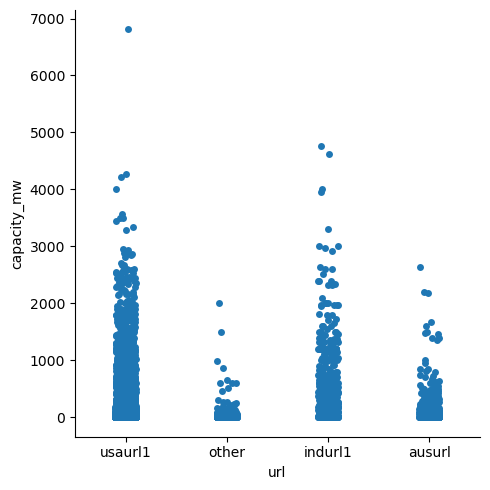

In [295]:
plt.figure(figsize=(3,4))
sns.catplot(x=data['url'],y=data['capacity_mw'])
plt.show()

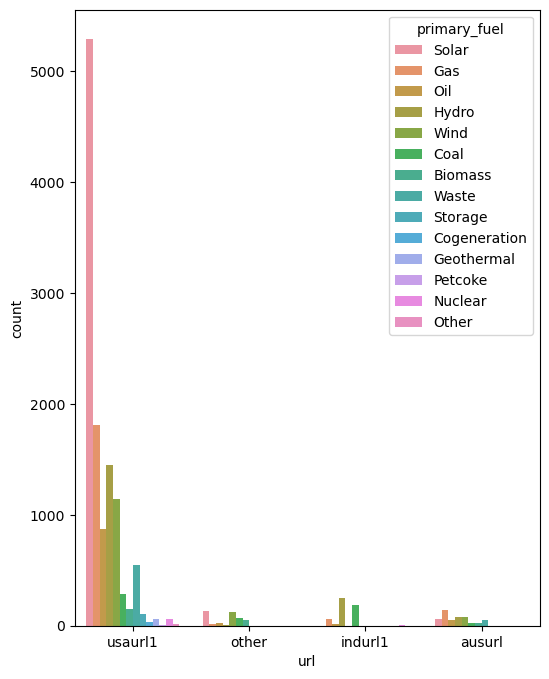

In [299]:
plt.figure(figsize=(6,8))
sns.countplot(x=data['url'],hue=data['primary_fuel'])
plt.show()

In [ ]:
#There seems to be a relation so let us visualize them

In [678]:
a=one_hot.fit_transform(data[['url']])
a=pd.DataFrame(a)
data=pd.concat([a,data],axis=1)
data=data.drop(columns='url')
data

,0,1,2,3,0,...,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,...,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,...,6.087400,3.040800,3.405800,2.813816,2.467
2,0.0,0.0,0.0,1.0,0.0,...,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,...,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,...,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...
13293,1.0,0.0,0.0,0.0,1.0,...,50.183889,46.035278,31.444722,37.317778,0.0
13294,1.0,0.0,0.0,0.0,1.0,...,334.074000,359.507944,329.436222,319.450611,0.0
13295,1.0,0.0,0.0,0.0,1.0,...,2.590111,5.216667,5.176944,5.341111,0.0
13296,1.0,0.0,0.0,0.0,1.0,...,24.086111,23.043889,19.885000,19.558056,0.0


In [679]:
data['geolocation_source'].value_counts()

geolocation_source
usa1    11837
usa2      826
aus1      512
ind1      119
ind2        4
Name: count, dtype: int64

<Axes: xlabel='geolocation_source', ylabel='count'>

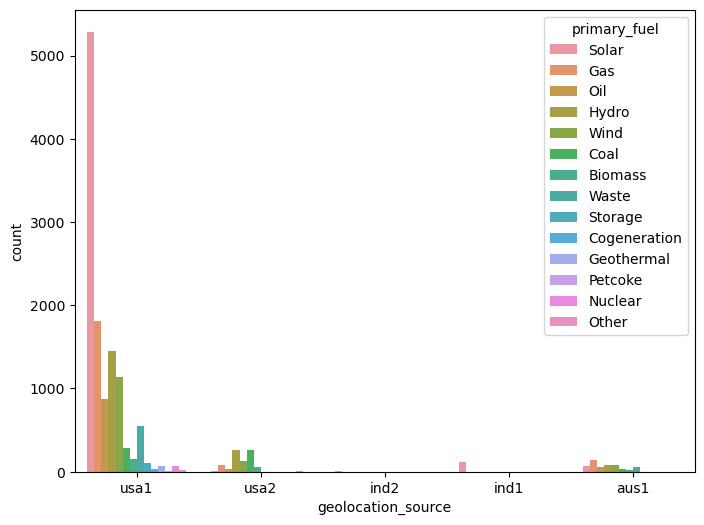

In [680]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['geolocation_source'],hue=data['primary_fuel'])

<Figure size 800x600 with 0 Axes>

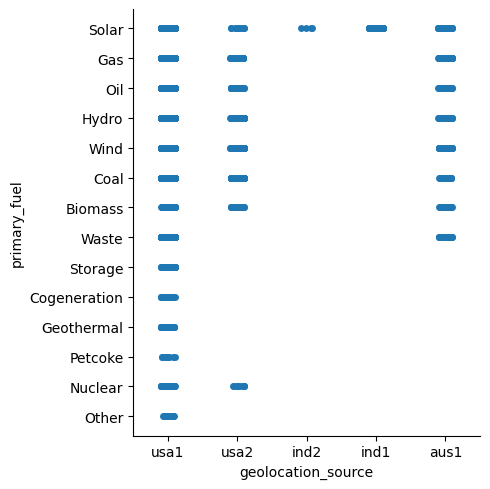

In [311]:
plt.figure(figsize=(8,6))
sns.catplot(x=data['geolocation_source'],y=data['primary_fuel'])

In [681]:
a=one_hot.fit_transform(data[['geolocation_source']])
a=pd.DataFrame(a)
data=pd.concat([a,data],axis=1)
data=data.drop(columns='geolocation_source')

In [682]:
data.head()

,0,1,2,3,4,...,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,...,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,...,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,0.0,1.0,0.0,...,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,...,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,...,15.2858,2.4574,2.0230,1.984000,421.938592


In [683]:
data['commissioning_year'].value_counts()

commissioning_year
2017.000000    2741
2015.000000    1060
2019.000000     598
2018.000000     596
2016.000000     569
               ... 
1984.319444       1
2006.435897       1
1974.465556       1
2000.684211       1
2013.775510       1
Name: count, Length: 1936, dtype: int64

In [319]:
 pd.set_option('display.max_rows', None)

In [684]:
data['commissioning_year'].value_counts()

commissioning_year
2017.000000    2741
2015.000000    1060
2019.000000     598
2018.000000     596
2016.000000     569
               ... 
1984.319444       1
2006.435897       1
1974.465556       1
2000.684211       1
2013.775510       1
Name: count, Length: 1936, dtype: int64

In [321]:
index=data['commissioning_year'].value_counts().index
index

Index([     2017.0,      2015.0,      2019.0,      2018.0,      2016.0,
            2012.0,      2014.0,      2013.0,      2011.0,      2009.0,
       ...
         1957.4988, 1974.239316, 1975.188061,      1961.4, 1968.154087,
       1984.319444, 2006.435897, 1974.465556, 2000.684211,  2013.77551],
      dtype='object', name='commissioning_year', length=1936)

In [323]:
from sklearn.preprocessing import StandardScaler

In [325]:
StandardScaler().fit_transform(data[['commissioning_year']])

array([[ 0.66754473],
       [ 0.62352156],
       [ 0.66754473],
       ...,
       [ 0.57949839],
       [-0.52108089],
       [ 0.35938253]])

In [327]:
data['commissioning_year'].value_counts()

commissioning_year
2017.0         2741
2015.0         1060
2019.0          598
2018.0          596
2016.0          569
2012.0          446
2014.0          427
2013.0          401
2011.0          307
2009.0          205
2010.0          198
2002.0          172
2008.0          166
2001.0          154
2020.0          151
2003.0          139
2000.0          115
2006.0          114
1987.0          113
2007.0          112
1988.0          109
1989.0          107
2004.0          104
2005.0          102
1990.0           99
1986.0           91
1985.0           86
1991.0           81
1993.0           81
1999.0           79
1992.0           70
1984.0           69
1994.0           66
1995.0           60
1996.0           58
1983.0           56
1997.0           42
1973.0           40
1970.0           39
1998.0           39
1982.0           38
1968.0           34
1972.0           34
1969.0           33
1980.0           32
1981.0           31
1971.0           30
1925.0           28
1978.0           27
1

So here we can see that the year are in floating number but it when we will scale it than it will come down to just the same
scale and the year which are same will be closer an will represent the same year.
So as of now there is no need of grouping this columns . We can let this be as it is

In [328]:
data.head()

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [685]:
#now comes the visualization and the treating of the continous columns
continous_columns=['latitude','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014',
                  'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018',
                   'generation_gwh_2019']

In [686]:
pd.set_option('display.max_rows', 10)

In [687]:
data[continous_columns]

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,41.6327,-71.4963,2017.0,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,41.0930,-73.9828,2016.0,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467
2,36.2838,-80.8434,2017.0,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,36.2167,-80.5525,2017.0,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,36.1475,-80.6561,2017.0,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...
13293,-36.0094,145.9995,2015.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,0.0
13294,-23.8306,151.1519,2015.0,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.0
13295,-22.2426,131.7931,2015.0,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.0
13296,-25.2323,130.9912,1990.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.0


In [339]:
from scipy.stats import zscore

In [344]:
for i in data[continous_columns]:
    print(data[i].dtype)

float64
float64
object
float64
float64
float64
float64
float64
float64
object


In [346]:
data['generation_gwh_2019'].value_counts() #There is a object columns in this

generation_gwh_2019
421.93859239592916               2102
0.0                              1784
0.001                              13
0.005                              12
0.003                               9
                                 ... 
37.279                              1
158.574                             1
221.904                             1
8.811                               1
Central Electricity Authority       1
Name: count, Length: 8369, dtype: int64

In [688]:
data['generation_gwh_2019']=data['generation_gwh_2019'].replace({'Central Electricity Authority':421.93859239})

In [689]:
data['generation_gwh_2019'].value_counts()

generation_gwh_2019
421.938592    2102
0.000000      1784
0.001000        13
0.005000        12
0.003000         9
              ... 
37.279000        1
158.574000       1
221.904000       1
8.811000         1
421.938592       1
Name: count, Length: 8369, dtype: int64

In [690]:
for i in data[continous_columns]:
    print(data[i].dtype)

float64
float64
object
float64
float64
float64
float64
float64
float64
float64


In [693]:
continous_columns.remove('commissioning_year') #We have removed the year columns as it is year not a continous column

In [694]:
data[continous_columns]

,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,41.6327,-71.4963,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,41.0930,-73.9828,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467000
2,36.2838,-80.8434,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,36.2167,-80.5525,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,36.1475,-80.6561,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...
13293,-36.0094,145.9995,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,0.000000
13294,-23.8306,151.1519,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.000000
13295,-22.2426,131.7931,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.000000
13296,-25.2323,130.9912,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.000000


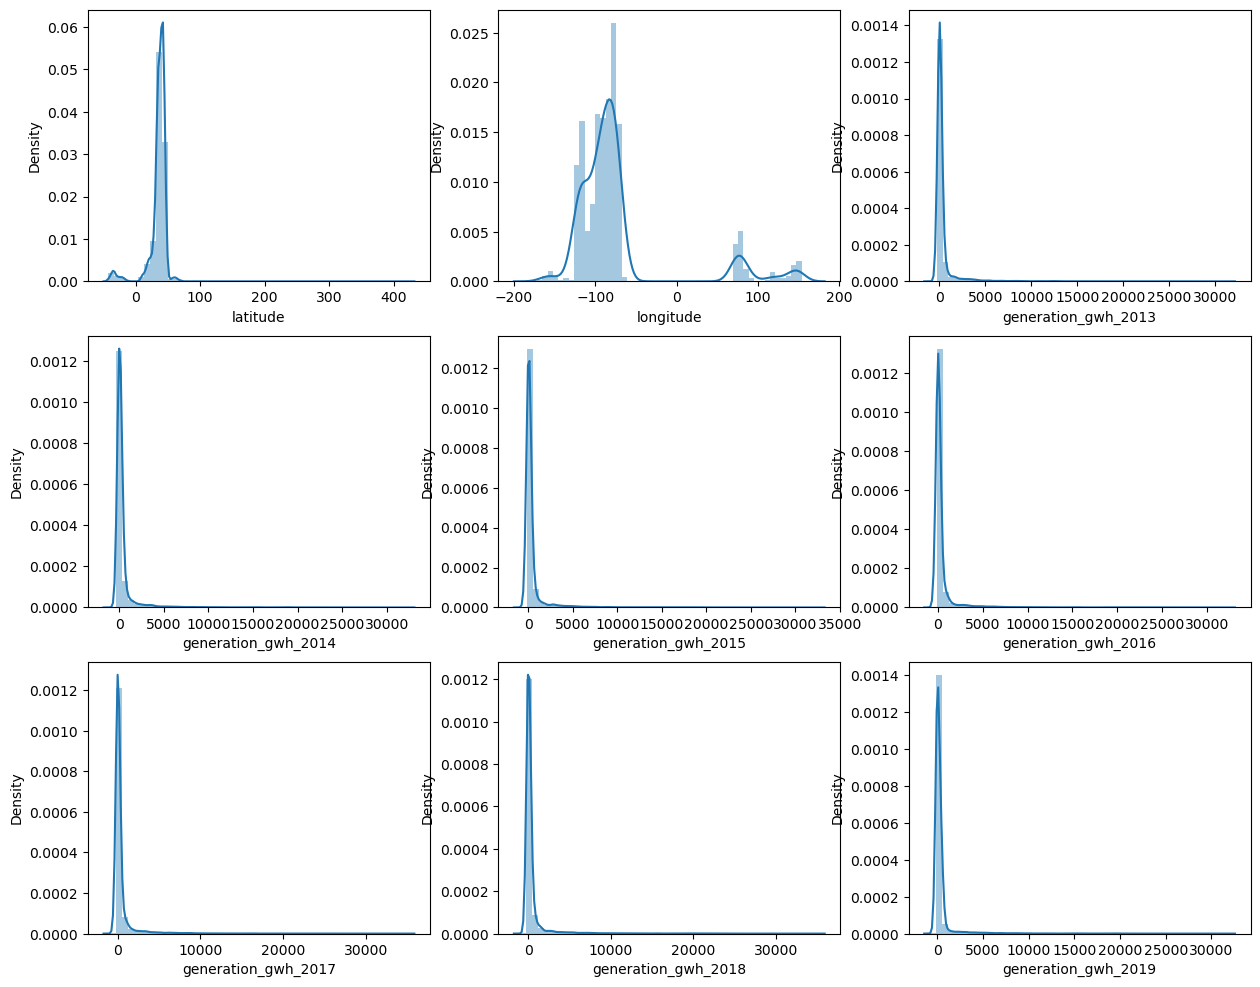

In [369]:
#Now let us visalize the continous columns
plt.figure(figsize=(15,12))
plotnumber=1
for i in continous_columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

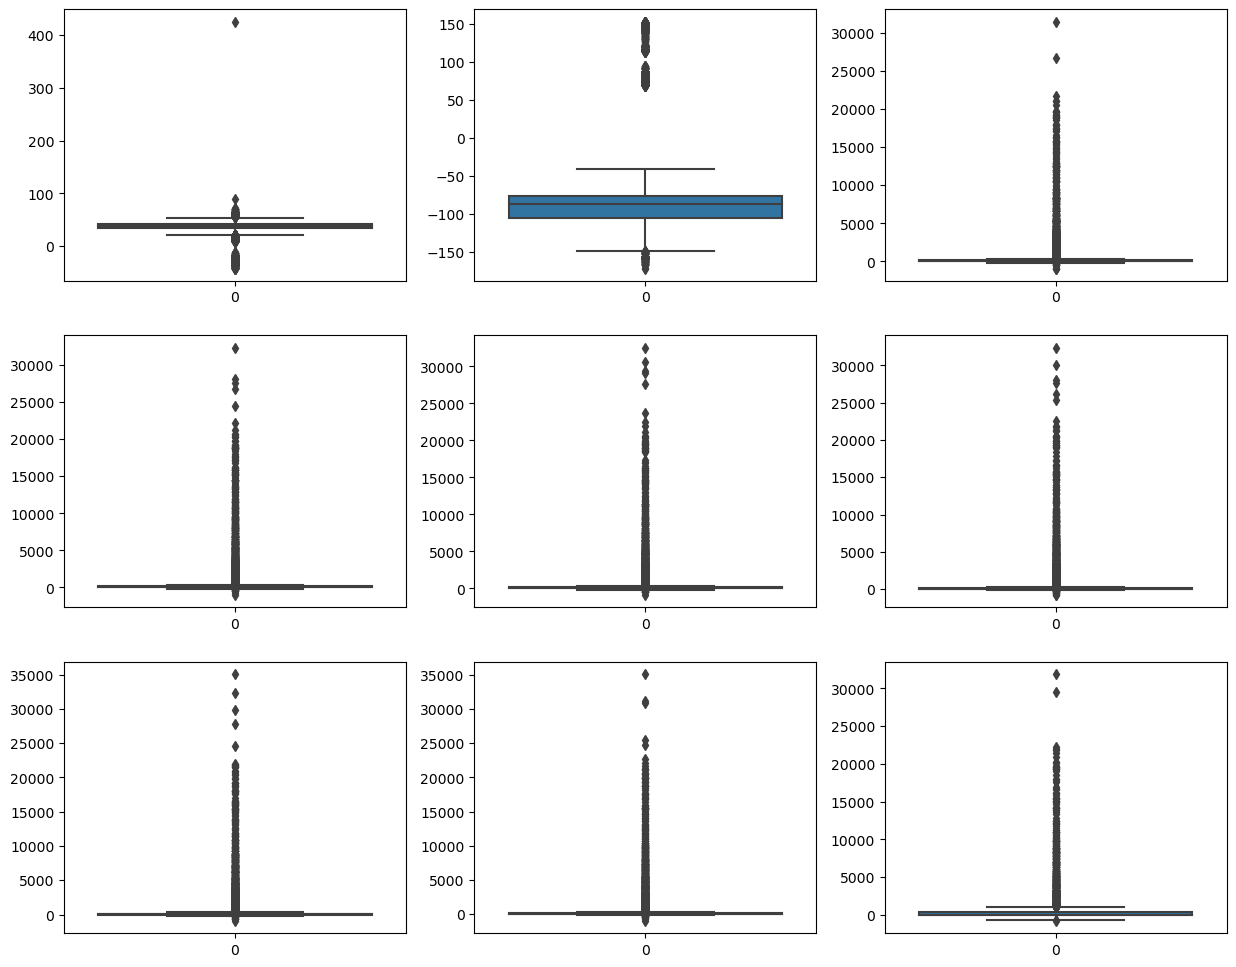

In [370]:
#The longitude and the latitude column has the most outliers
#Let us see the box plot 
plt.figure(figsize=(15,12))
plotnumber=1
for i in continous_columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(data[i])
    plotnumber+=1
plt.show()

In [695]:
#All the columns has outliers let us use the zscore to remove them and see tham
np.abs(zscore(data[continous_columns[0]]))

0        0.429230
1        0.394235
2        0.082405
3        0.078054
4        0.073567
           ...   
13293    4.605118
13294    3.815439
13295    3.712472
13296    3.906326
13297    3.616470
Name: latitude, Length: 13298, dtype: float64

In [374]:
np.abs(zscore(data[continous_columns[0]]))
index=np.where(np.abs(zscore(data[continous_columns[0]]))>3)
len(index[0])

514

In [376]:
np.abs(zscore(data[continous_columns[1]]))
index=np.where(np.abs(zscore(data[continous_columns[1]]))>3)
len(index[0])

466

In [378]:
np.abs(zscore(data[continous_columns[2]]))
index=np.where(np.abs(zscore(data[continous_columns[2]]))>3)
len(index[0])

246

In [379]:
np.abs(zscore(data[continous_columns[3]]))
index=np.where(np.abs(zscore(data[continous_columns[3]]))>3)
len(index[0])

246

In [380]:
np.abs(zscore(data[continous_columns[4]]))
index=np.where(np.abs(zscore(data[continous_columns[4]]))>3)
len(index[0])

251

In [696]:
for i in range(len(continous_columns)):
    np.abs(zscore(data[continous_columns[i]]))
    index=np.where(np.abs(zscore(data[continous_columns[i]]))>3)
    print(len(index[0]),'',continous_columns[i])

514  latitude
466  longitude
246  generation_gwh_2013
246  generation_gwh_2014
251  generation_gwh_2015
254  generation_gwh_2016
251  generation_gwh_2017
244  generation_gwh_2018
237  generation_gwh_2019


So all the columns have outliers and let us remove them
We will make the model using two approaches . we will also use the default dataset columns and will also use the transformed dataset columns whichever will work bettwe we will use

In [697]:
index=np.where(np.abs(zscore(data[continous_columns]))>3)

In [698]:
index=np.where(np.abs(zscore(data[continous_columns]))>4.0)
index=index[0]
print(len(index))

1551


So this is close to 10% of the whole dataset which we can remove here
We know that 4.0 is a large zscore number but we can not also loose too many data points
So let us delete this and also transform the columns

In [395]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [407]:
transformed=pt.fit_transform(data[continous_columns])
transformed=pd.DataFrame(transformed,columns=continous_columns)
transformed

,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.467751,0.431034,0.683050,0.821633,0.706697,0.754197,0.695366,0.622740,0.280250
1,0.418363,0.357037,-0.250591,-0.293022,-0.288842,-0.289146,-0.286932,-0.286114,-0.335506
2,-0.014198,0.149116,-0.140996,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
3,-0.020135,0.158041,-0.139827,-0.255422,-0.259029,-0.286960,-0.289303,-0.286459,0.280250
4,-0.026254,0.154863,-0.141511,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
...,...,...,...,...,...,...,...,...,...
13293,-3.217317,2.459693,-0.179655,-0.206248,-0.184402,-0.185909,-0.214560,-0.198306,-0.349306
13294,-3.048063,2.469307,0.015322,0.046214,0.171531,0.192782,0.159255,0.157693,-0.349306
13295,-3.024534,2.432649,-0.264615,-0.309248,-0.302772,-0.280958,-0.280450,-0.276528,-0.349306
13296,-3.068505,2.431098,-0.212344,-0.250153,-0.238342,-0.232438,-0.239765,-0.236500,-0.349306


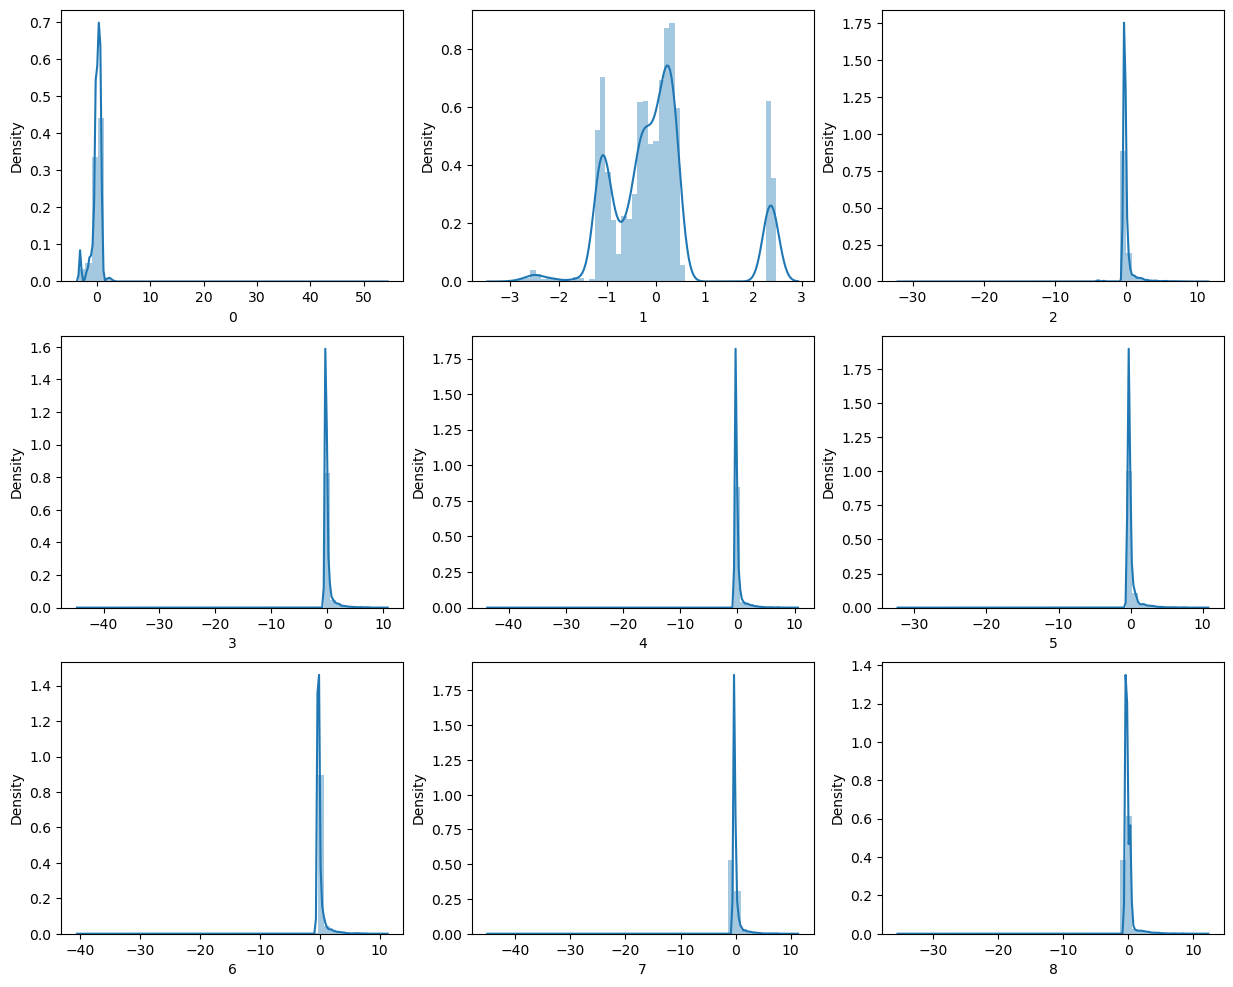

In [399]:
#Now let us visalize the continous columns now
plt.figure(figsize=(15,12))
plotnumber=1
for i in transformed:
    plt.subplot(3,3,plotnumber)
    sns.distplot(transformed[i])
    plotnumber+=1
plt.show()

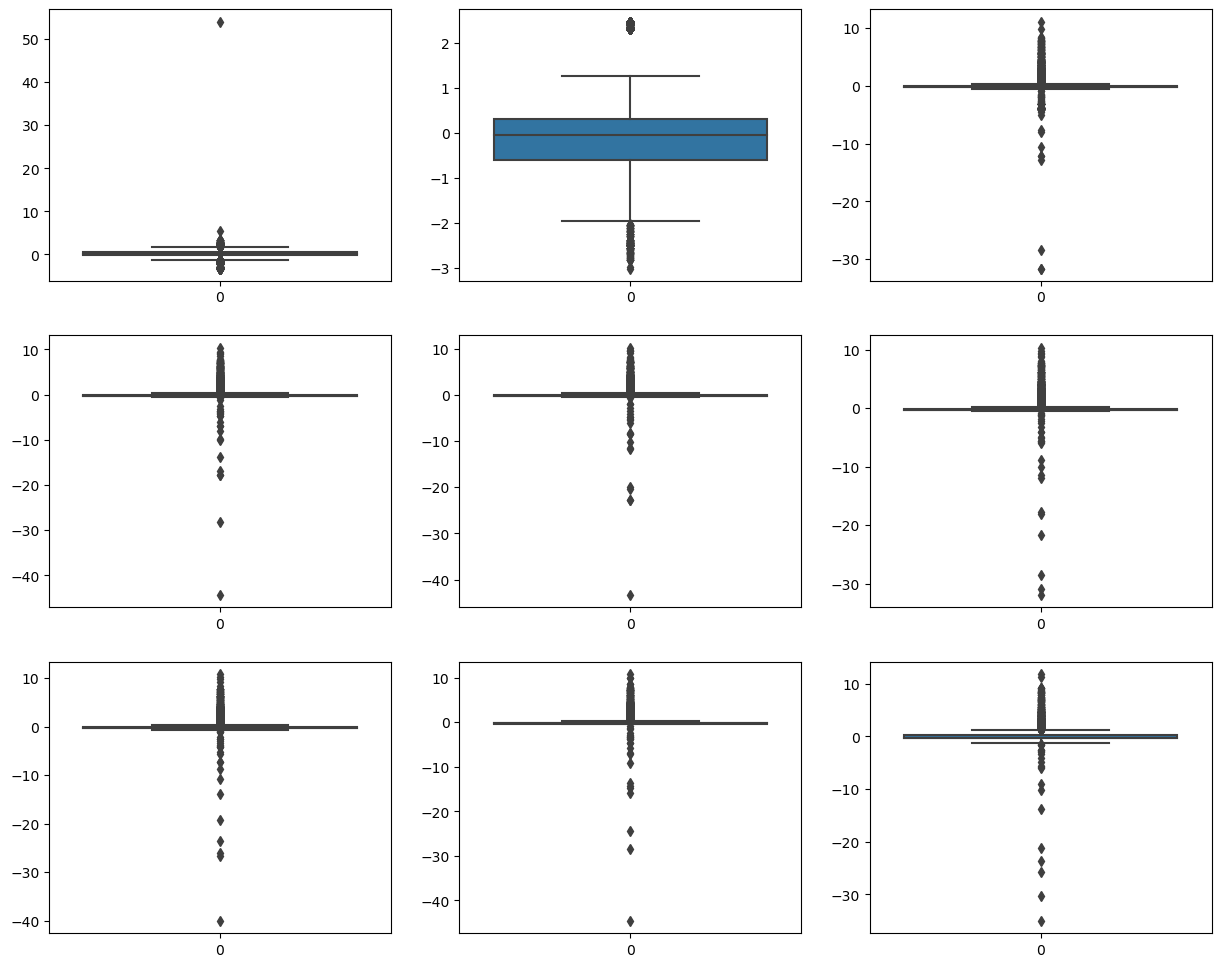

In [401]:
plt.figure(figsize=(15,12))
plotnumber=1
for i in transformed:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(transformed[i])
    plotnumber+=1
plt.show()

So outliers are still there but there has been a significant decrease in the number of the outliers

In [404]:
index=np.where(np.abs(zscore(transformed))>3.5)

In [405]:
len(index[0])

1375

See there has been a decrease

In [406]:
data.head()

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [410]:
data_transformed=data.drop(columns=continous_columns)

In [412]:
data_transformed=pd.concat([data_transformed,transformed],axis=1)

We have defined a new transformed dataframe with the transformed columns

In [413]:
data.head()

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.6327,-71.4963,Solar,2017.0,935.214601,1207.336303,1000.5550,1084.1912,1010.6688,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,41.0930,-73.9828,Solar,2016.0,6.724000,6.722400,6.0874,3.0408,3.4058,2.813816,2.467000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2838,-80.8434,Solar,2017.0,60.458400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.2167,-80.5525,Solar,2017.0,61.175800,20.512160,15.8402,3.5918,2.8078,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.1475,-80.6561,Solar,2017.0,60.143400,19.997560,15.2858,2.4574,2.0230,1.984000,421.938592


In [699]:
#Let us delete the outliers
index=np.where(np.abs(zscore(data[continous_columns]))>4.0)[0]
len(index)

1551

In [700]:
data=data.drop(index=index)

In [701]:
data.reset_index(drop=True,inplace=True)

In [702]:
data

,0,1,2,3,4,...,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,...,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,...,6.087400,3.040800,3.405800,2.813816,2.467000
2,0.0,0.0,0.0,1.0,0.0,...,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,...,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,...,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,0.0,0.0,...,85.743484,71.223103,40.697476,28.786152,0.000000
12649,1.0,0.0,0.0,0.0,0.0,...,334.074000,359.507944,329.436222,319.450611,0.000000
12650,1.0,0.0,0.0,0.0,0.0,...,2.590111,5.216667,5.176944,5.341111,0.000000
12651,1.0,0.0,0.0,0.0,0.0,...,24.086111,23.043889,19.885000,19.558056,0.000000


In [424]:
data_transformed

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,primary_fuel,commissioning_year,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,0.467751,0.431034,0.683050,0.821633,0.706697,0.754197,0.695366,0.622740,0.280250
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,Solar,2016.0,0.418363,0.357037,-0.250591,-0.293022,-0.288842,-0.289146,-0.286932,-0.286114,-0.335506
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.014198,0.149116,-0.140996,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.020135,0.158041,-0.139827,-0.255422,-0.259029,-0.286960,-0.289303,-0.286459,0.280250
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.026254,0.154863,-0.141511,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.00,Hydro,2015.0,-3.217317,2.459693,-0.179655,-0.206248,-0.184402,-0.185909,-0.214560,-0.198306,-0.349306
13294,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,Gas,2015.0,-3.048063,2.469307,0.015322,0.046214,0.171531,0.192782,0.159255,0.157693,-0.349306
13295,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,Solar,2015.0,-3.024534,2.432649,-0.264615,-0.309248,-0.302772,-0.280958,-0.280450,-0.276528,-0.349306
13296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,Gas,1990.0,-3.068505,2.431098,-0.212344,-0.250153,-0.238342,-0.232438,-0.239765,-0.236500,-0.349306


In [431]:
index=np.where(np.abs(zscore(data_transformed[continous_columns]))>3.5)[0]
len(index)

1375

In [433]:
data_transformed=data_transformed.drop(index=index)

In [434]:
data_transformed.reset_index(drop=True)

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,primary_fuel,commissioning_year,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,0.467751,0.431034,0.683050,0.821633,0.706697,0.754197,0.695366,0.622740,0.280250
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,Solar,2016.0,0.418363,0.357037,-0.250591,-0.293022,-0.288842,-0.289146,-0.286932,-0.286114,-0.335506
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.014198,0.149116,-0.140996,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.020135,0.158041,-0.139827,-0.255422,-0.259029,-0.286960,-0.289303,-0.286459,0.280250
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.026254,0.154863,-0.141511,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.00,Hydro,2015.0,-3.217317,2.459693,-0.179655,-0.206248,-0.184402,-0.185909,-0.214560,-0.198306,-0.349306
12941,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,Gas,2015.0,-3.048063,2.469307,0.015322,0.046214,0.171531,0.192782,0.159255,0.157693,-0.349306
12942,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,Solar,2015.0,-3.024534,2.432649,-0.264615,-0.309248,-0.302772,-0.280958,-0.280450,-0.276528,-0.349306
12943,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,Gas,1990.0,-3.068505,2.431098,-0.212344,-0.250153,-0.238342,-0.232438,-0.239765,-0.236500,-0.349306


So all the preprocessing steps completed now let us do the encoding of thr primary fuel which is one of the label

In [439]:
index=data['primary_fuel'].value_counts().index
index

Index(['Solar', 'Gas', 'Hydro', 'Wind', 'Oil', 'Waste', 'Coal', 'Biomass',
       'Storage', 'Geothermal', 'Cogeneration', 'Other', 'Nuclear', 'Petcoke'],
      dtype='object', name='primary_fuel')

In [440]:
data['primary_fuel'].value_counts()

primary_fuel
Solar           5440
Gas             1893
Hydro           1702
Wind            1266
Oil              930
Waste            546
Coal             413
Biomass          221
Storage          104
Geothermal        65
Cogeneration      34
Other             16
Nuclear           13
Petcoke           10
Name: count, dtype: int64

In [442]:
#for the regression model we will have to combine it 
def fuel(value):
    if value==index[0]:
        return value
    if value in index[1:4]:
        return 'GAs'
    else:
        return 'others'
#It is for the regression model

In [443]:
data_reg=data
data_reg_tranformed=data_transformed
data_classi=data
data_classi_tranformed=data_transformed
#Defined different models for regression and classification

In [445]:
pd.set_option('display.max_rows', 10)
data_reg

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,41.6327,-71.4963,Solar,2017.0,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,41.0930,-73.9828,Solar,2016.0,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2838,-80.8434,Solar,2017.0,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2167,-80.5525,Solar,2017.0,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.1475,-80.6561,Solar,2017.0,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.00,-20.7437,139.4803,Gas,2014.0,95.239944,80.548317,85.743484,71.223103,40.697476,28.786152,0.000000
12649,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,-23.8306,151.1519,Gas,2015.0,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.000000
12650,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,-22.2426,131.7931,Solar,2015.0,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.000000
12651,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,-25.2323,130.9912,Gas,1990.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.000000


In [448]:
data_reg['primary_fuel'] =      data_reg['primary_fuel'].apply(fuel)

In [450]:
data_reg_tranformed['primary_fuel']=data_reg_tranformed['primary_fuel'].apply(fuel)

In [452]:
data_reg_tranformed

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,primary_fuel,commissioning_year,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,0.467751,0.431034,0.683050,0.821633,0.706697,0.754197,0.695366,0.622740,0.280250
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,Solar,2016.0,0.418363,0.357037,-0.250591,-0.293022,-0.288842,-0.289146,-0.286932,-0.286114,-0.335506
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.014198,0.149116,-0.140996,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.020135,0.158041,-0.139827,-0.255422,-0.259029,-0.286960,-0.289303,-0.286459,0.280250
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,Solar,2017.0,-0.026254,0.154863,-0.141511,-0.256644,-0.260529,-0.291568,-0.292605,-0.289686,0.280250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.00,GAs,2015.0,-3.217317,2.459693,-0.179655,-0.206248,-0.184402,-0.185909,-0.214560,-0.198306,-0.349306
13294,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,GAs,2015.0,-3.048063,2.469307,0.015322,0.046214,0.171531,0.192782,0.159255,0.157693,-0.349306
13295,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,Solar,2015.0,-3.024534,2.432649,-0.264615,-0.309248,-0.302772,-0.280958,-0.280450,-0.276528,-0.349306
13296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,GAs,1990.0,-3.068505,2.431098,-0.212344,-0.250153,-0.238342,-0.232438,-0.239765,-0.236500,-0.349306


In [454]:
data_reg

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,41.6327,-71.4963,Solar,2017.0,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,41.0930,-73.9828,Solar,2016.0,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467000
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2838,-80.8434,Solar,2017.0,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2167,-80.5525,Solar,2017.0,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.1475,-80.6561,Solar,2017.0,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.00,-20.7437,139.4803,GAs,2014.0,95.239944,80.548317,85.743484,71.223103,40.697476,28.786152,0.000000
12649,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,-23.8306,151.1519,GAs,2015.0,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.000000
12650,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,-22.2426,131.7931,Solar,2015.0,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.000000
12651,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,-25.2323,130.9912,GAs,1990.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.000000


We will first make the model using the normal default dataset without any transformation

In [465]:
a=one_hot.fit_transform(data_reg[['primary_fuel']])
a=pd.DataFrame(a)
data_reg=pd.concat([a,data_reg],axis=1)
data_reg=data_reg.drop(columns='primary_fuel')
data_reg

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,41.6327,-71.4963,2017.0,935.214601,1207.336303,1000.555000,1084.191200,1010.668800,889.532800,421.938592
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,41.0930,-73.9828,2016.0,6.724000,6.722400,6.087400,3.040800,3.405800,2.813816,2.467000
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2838,-80.8434,2017.0,60.458400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.2167,-80.5525,2017.0,61.175800,20.512160,15.840200,3.591800,2.807800,2.730800,421.938592
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,36.1475,-80.6561,2017.0,60.143400,19.997560,15.285800,2.457400,2.023000,1.984000,421.938592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.00,-20.7437,139.4803,2014.0,95.239944,80.548317,85.743484,71.223103,40.697476,28.786152,0.000000
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,-23.8306,151.1519,2015.0,175.091556,231.251278,334.074000,359.507944,329.436222,319.450611,0.000000
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,-22.2426,131.7931,2015.0,2.547944,2.346889,2.590111,5.216667,5.176944,5.341111,0.000000
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,-25.2323,130.9912,1990.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,0.000000


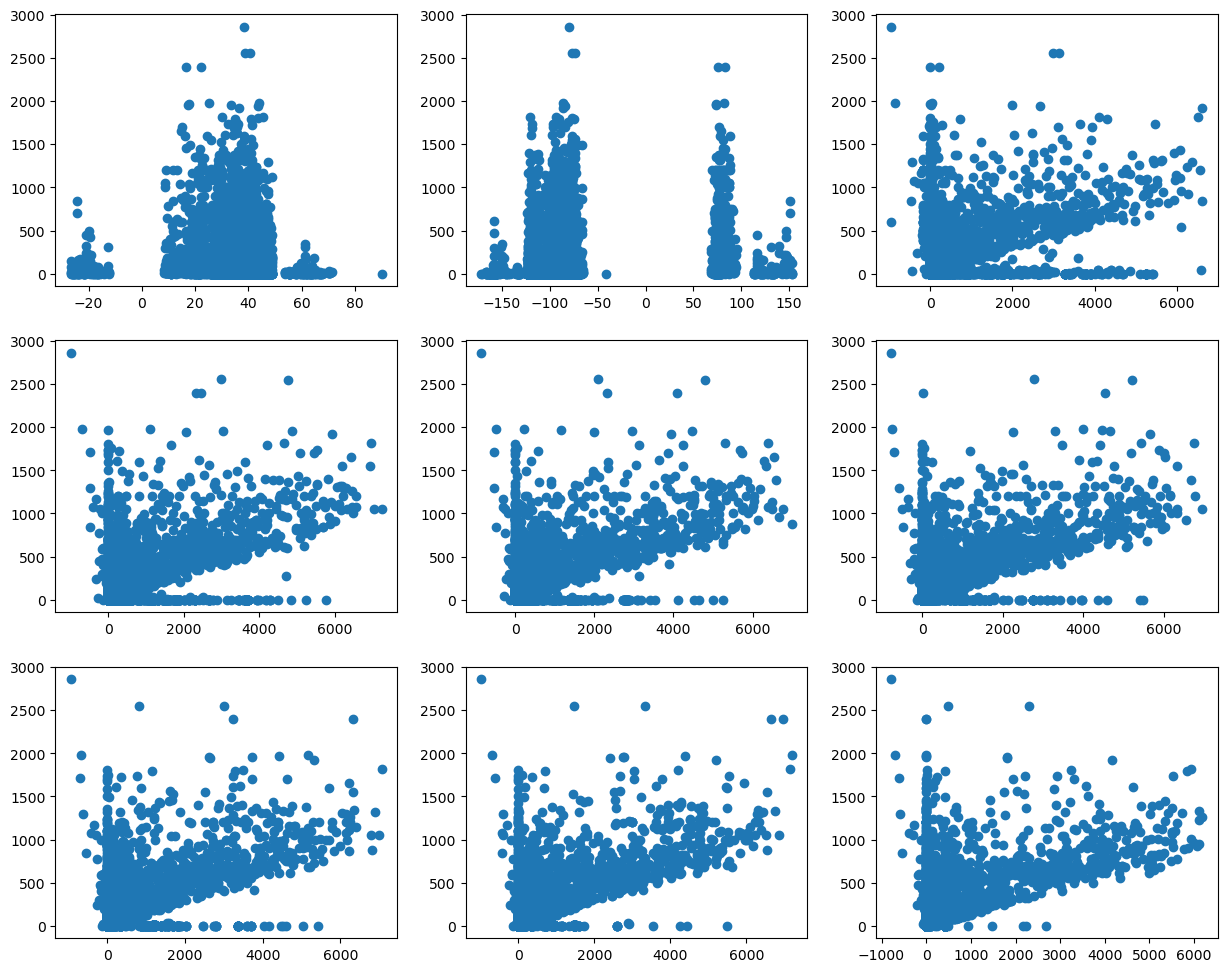

In [476]:
#Now let us see the relation of the continous columns with the label with is te capacity_mw
plt.figure(figsize=(15,12))
plotnumber=1
for i in continous_columns:
    plt.subplot(3,3,plotnumber)
    plt.scatter(x=data_reg[i],y=data_reg['capacity_mw'])
    plotnumber+=1
plt.show()

In [477]:
#The relation seems to be very good except for that in longitude and latitude
continous_columns.append('capacity_mw')

In [478]:
continous_columns.append('commissioning_year')

let us see the relation of the continous columns with the label

In [479]:
corr=data[continous_columns].corr()

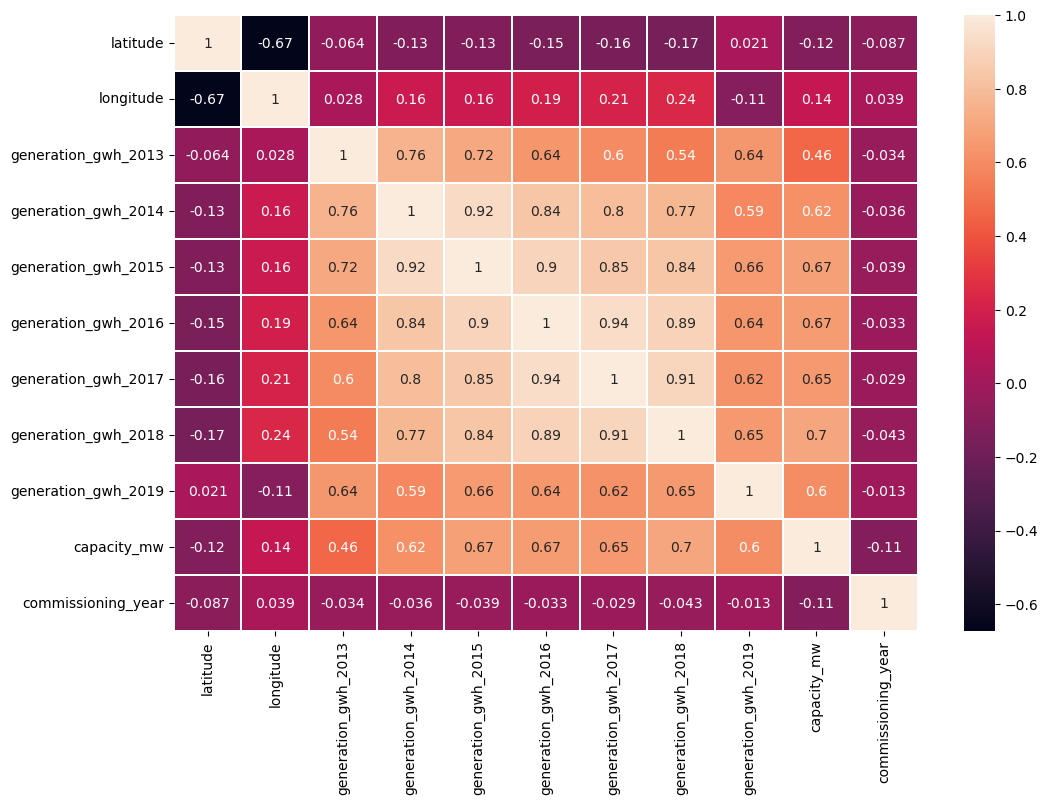

In [480]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,linewidths=0.1,annot=True)
plt.show()

In [481]:
data_without_transformation=data_reg.copy()

In [ ]:
#Let us see the variance inlfation factor and see the relation as there are some multi relation detected in the columns

In [485]:
continous_columns.remove('capacity_mw')

In [487]:
scaler=StandardScaler()
scaled=scaler.fit_transform(data_reg[continous_columns])
scaled=pd.DataFrame(scaled,columns=continous_columns)
scaled

,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,commissioning_year
0,0.484532,0.168398,1.019073,1.334164,1.055082,1.197709,1.097494,0.928093,0.297025,0.655290
1,0.427089,0.120318,-0.319874,-0.337609,-0.326753,-0.329977,-0.332089,-0.325335,-0.387229,0.611766
2,-0.084775,-0.012340,-0.242385,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
3,-0.091917,-0.006715,-0.241351,-0.318407,-0.313201,-0.329199,-0.332938,-0.325452,0.297025,0.655290
4,-0.099282,-0.008719,-0.242839,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
...,...,...,...,...,...,...,...,...,...,...
12648,-6.154466,4.247907,-0.192228,-0.234811,-0.216069,-0.233634,-0.279162,-0.288622,-0.391253,0.524718
12649,-6.483018,4.473593,-0.077076,-0.024968,0.128992,0.173718,0.130638,0.122249,-0.391253,0.568242
12650,-6.314000,4.099265,-0.325896,-0.343701,-0.331613,-0.326903,-0.329575,-0.321762,-0.391253,0.568242
12651,-6.632207,4.083759,-0.297921,-0.315257,-0.301743,-0.301713,-0.308700,-0.301666,-0.391253,-0.519853


In [489]:
x_scaled=data_reg.drop(columns=continous_columns)
x_scaled=pd.concat([x_scaled,scaled],axis=1)
x_scaled

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,commissioning_year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.484532,0.168398,1.019073,1.334164,1.055082,1.197709,1.097494,0.928093,0.297025,0.655290
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.00,0.427089,0.120318,-0.319874,-0.337609,-0.326753,-0.329977,-0.332089,-0.325335,-0.387229,0.611766
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,-0.084775,-0.012340,-0.242385,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,-0.091917,-0.006715,-0.241351,-0.318407,-0.313201,-0.329199,-0.332938,-0.325452,0.297025,0.655290
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,-0.099282,-0.008719,-0.242839,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.00,-6.154466,4.247907,-0.192228,-0.234811,-0.216069,-0.233634,-0.279162,-0.288622,-0.391253,0.524718
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,154.00,-6.483018,4.473593,-0.077076,-0.024968,0.128992,0.173718,0.130638,0.122249,-0.391253,0.568242
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24,-6.314000,4.099265,-0.325896,-0.343701,-0.331613,-0.326903,-0.329575,-0.321762,-0.391253,0.568242
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.95,-6.632207,4.083759,-0.297921,-0.315257,-0.301743,-0.301713,-0.308700,-0.301666,-0.391253,-0.519853


In [ ]:
#so this is the standardized data 

In [491]:
x_scaled=x_scaled.drop(columns='capacity_mw')

In [492]:
x_scaled

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,commissioning_year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.484532,0.168398,1.019073,1.334164,1.055082,1.197709,1.097494,0.928093,0.297025,0.655290
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.427089,0.120318,-0.319874,-0.337609,-0.326753,-0.329977,-0.332089,-0.325335,-0.387229,0.611766
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.084775,-0.012340,-0.242385,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.091917,-0.006715,-0.241351,-0.318407,-0.313201,-0.329199,-0.332938,-0.325452,0.297025,0.655290
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.099282,-0.008719,-0.242839,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.154466,4.247907,-0.192228,-0.234811,-0.216069,-0.233634,-0.279162,-0.288622,-0.391253,0.524718
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.483018,4.473593,-0.077076,-0.024968,0.128992,0.173718,0.130638,0.122249,-0.391253,0.568242
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.314000,4.099265,-0.325896,-0.343701,-0.331613,-0.326903,-0.329575,-0.321762,-0.391253,0.568242
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.632207,4.083759,-0.297921,-0.315257,-0.301743,-0.301713,-0.308700,-0.301666,-0.391253,-0.519853


In [493]:
y=data_reg['capacity_mw']
y

0          0.00
1          2.00
2          0.00
3          0.00
4          0.00
          ...  
12648     30.00
12649    154.00
12650      0.24
12651     10.95
12652    180.00
Name: capacity_mw, Length: 12653, dtype: float64

now let us see the variance inlatio factor

In [494]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [496]:
for i in range(10):
    print(variance_inflation_factor(x_scaled[continous_columns],i))
    print(continous_columns[i])
    print('     ')

1.8613290721362246
latitude
     
2.1218800565562836
longitude
     
3.012217891757298
generation_gwh_2013
     
8.248675172865964
generation_gwh_2014
     
11.619575178002291
generation_gwh_2015
     
12.668916363427861
generation_gwh_2016
     
10.949419739812877
generation_gwh_2017
     
7.456887448633756
generation_gwh_2018
     
2.6189586002747616
generation_gwh_2019
     
1.0140957487992714
commissioning_year
     


In [ ]:
#There are some mult collinearity let us ignore that and build the model if there is no high accuracy we will remove it

In [498]:
x_scaled.columns

Index([                    0,                     1,                     2,
                           0,                     1,                     2,
                           3,                     4,                     0,
                           1,                     2,                     3,
                           0,                     1,                     2,
                           3,                     4,                     0,
                           1,                     2,                     3,
                           4,                     5,                     0,
                           1,                     2,            'latitude',
                 'longitude', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019',  'commissioning_year'],
      dtype='object')

In [499]:
x_scaled.columns=['0', '1', '2', '0', '1', '2', '3', '4', '0', '1', '2', '3', '0', '1', '2', '3', '4', '0', '1', '2', '3', '4', '5', '0', '1', '2', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'commissioning_year']


In [ ]:
#We have to train the change the column names to string as the model will not work like this

In [505]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score 

In [501]:
x_scaled

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,commissioning_year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.484532,0.168398,1.019073,1.334164,1.055082,1.197709,1.097494,0.928093,0.297025,0.655290
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.427089,0.120318,-0.319874,-0.337609,-0.326753,-0.329977,-0.332089,-0.325335,-0.387229,0.611766
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.084775,-0.012340,-0.242385,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.091917,-0.006715,-0.241351,-0.318407,-0.313201,-0.329199,-0.332938,-0.325452,0.297025,0.655290
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.099282,-0.008719,-0.242839,-0.319124,-0.313972,-0.330802,-0.334051,-0.326508,0.297025,0.655290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.154466,4.247907,-0.192228,-0.234811,-0.216069,-0.233634,-0.279162,-0.288622,-0.391253,0.524718
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.483018,4.473593,-0.077076,-0.024968,0.128992,0.173718,0.130638,0.122249,-0.391253,0.568242
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.314000,4.099265,-0.325896,-0.343701,-0.331613,-0.326903,-0.329575,-0.321762,-0.391253,0.568242
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.632207,4.083759,-0.297921,-0.315257,-0.301743,-0.301713,-0.308700,-0.301666,-0.391253,-0.519853


In [502]:
y

0          0.00
1          2.00
2          0.00
3          0.00
4          0.00
          ...  
12648     30.00
12649    154.00
12650      0.24
12651     10.95
12652    180.00
Name: capacity_mw, Length: 12653, dtype: float64

In [503]:
#using the linear regression for the best random state prediction
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.6514721325530382 193


In [504]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [506]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
ds=DecisionTreeRegressor()

In [508]:
models=[rr,er,lr,gb,ad,bg,ri,ls,ds]

In [509]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.7701898294079105,
 ExtraTreesRegressor(): 0.7910981169555816,
 LinearRegression(): 0.6514721325530382,
 GradientBoostingRegressor(): 0.761560699718687,
 AdaBoostRegressor(): 0.24133193506053674,
 BaggingRegressor(): 0.7527923231512944,
 Ridge(): 0.6518000468127921,
 LassoCV(): 0.651508961583129,
 DecisionTreeRegressor(): 0.5603947712045785}

Let us see the multicollienearity and see if there is any difference or not

In [510]:
for i in range(10):
    print(variance_inflation_factor(x_scaled[continous_columns],i))
    print(continous_columns[i])
    print('     ')

1.8613290721362246
latitude
     
2.1218800565562836
longitude
     
3.012217891757298
generation_gwh_2013
     
8.248675172865964
generation_gwh_2014
     
11.619575178002291
generation_gwh_2015
     
12.668916363427861
generation_gwh_2016
     
10.949419739812877
generation_gwh_2017
     
7.456887448633756
generation_gwh_2018
     
2.6189586002747616
generation_gwh_2019
     
1.0140957487992714
commissioning_year
     


In [515]:
#Dropping some columns and see whether there is a difference or not
x_scaled=x_scaled.drop(columns='generation_gwh_2016')
continous_columns.remove('generation_gwh_2016')

In [517]:
for i in range(9):
    print(variance_inflation_factor(x_scaled[continous_columns],i))
    print(continous_columns[i])
    print('     ')

1.8608122408584804
latitude
     
2.12097771841282
longitude
     
3.0120405652158264
generation_gwh_2013
     
8.240243635383244
generation_gwh_2014
     
9.876882313120214
generation_gwh_2015
     
6.891846715159434
generation_gwh_2017
     
7.368599513963491
generation_gwh_2018
     
2.618909502156256
generation_gwh_2019
     
1.0140861699397177
commissioning_year
     


In [518]:
x_scaled=x_scaled.drop(columns='generation_gwh_2015')
continous_columns.remove('generation_gwh_2015')

In [519]:
for i in range(8):
    print(variance_inflation_factor(x_scaled[continous_columns],i))
    print(continous_columns[i])
    print('     ')

1.8607544713962154
latitude
     
2.1207888825828842
longitude
     
3.0067343258742953
generation_gwh_2013
     
4.472738894737797
generation_gwh_2014
     
6.677335261165502
generation_gwh_2017
     
7.119470177722509
generation_gwh_2018
     
2.551422631831041
generation_gwh_2019
     
1.0139210636368325
commissioning_year
     


In [520]:
x_scaled=x_scaled.drop(columns='generation_gwh_2018')
continous_columns.remove('generation_gwh_2018')

In [521]:
for i in range(7):
    print(variance_inflation_factor(x_scaled[continous_columns],i))
    print(continous_columns[i])
    print('     ')

1.8560441936011869
latitude
     
2.0398123878100547
longitude
     
2.7892995209764746
generation_gwh_2013
     
4.161803571570407
generation_gwh_2014
     
3.3012809273206765
generation_gwh_2017
     
2.197184596582589
generation_gwh_2019
     
1.0110936635344079
commissioning_year
     


In [522]:
x_scaled

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2017,generation_gwh_2019,commissioning_year
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.484532,0.168398,1.019073,1.334164,1.097494,0.297025,0.655290
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.427089,0.120318,-0.319874,-0.337609,-0.332089,-0.387229,0.611766
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.084775,-0.012340,-0.242385,-0.319124,-0.334051,0.297025,0.655290
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.091917,-0.006715,-0.241351,-0.318407,-0.332938,0.297025,0.655290
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.099282,-0.008719,-0.242839,-0.319124,-0.334051,0.297025,0.655290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.154466,4.247907,-0.192228,-0.234811,-0.279162,-0.391253,0.524718
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.483018,4.473593,-0.077076,-0.024968,0.130638,-0.391253,0.568242
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.314000,4.099265,-0.325896,-0.343701,-0.329575,-0.391253,0.568242
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.632207,4.083759,-0.297921,-0.315257,-0.308700,-0.391253,-0.519853


In [523]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.6283215623311492 157


In [524]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [525]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.781610422213415,
 ExtraTreesRegressor(): 0.7906113418159432,
 LinearRegression(): 0.6283215623311492,
 GradientBoostingRegressor(): 0.7520867332789005,
 AdaBoostRegressor(): -1.02134787111362,
 BaggingRegressor(): 0.7575457602216022,
 Ridge(): 0.6278738602254028,
 LassoCV(): 0.6280458692603244,
 DecisionTreeRegressor(): 0.5067801475117284}

In [526]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.6751826729260918
ExtraTreesRegressor() , 0.675078801284422
LinearRegression() , -1.3359275023486809e+23
GradientBoostingRegressor() , 0.6954359003921116
AdaBoostRegressor() , -1.1059512512546912
BaggingRegressor() , 0.6380189268590638
Ridge() , 0.5080915434107498
LassoCV() , 0.5018656264056479
DecisionTreeRegressor() , 0.2248869853249172


In [ ]:
#The tree based models are actually performing better after the revoing the multi collinearity issues from the dataset

In [ ]:
#Let us do the tuning for the gradient boost and extra tree to know which is the best model

In [528]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [529]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,
                         min_samples_split=2,n_estimators=50)

In [530]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
r2_score(y_test,pred)

0.77536807856506

In [531]:
#extra tree with an accuracy of 0.775
import joblib
joblib.dump(model,'extratre.PKL')

['extratre.PKL']

In [535]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

gb_regressor = GradientBoostingRegressor()

grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

grid_search_gb.fit(x_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best Score for Gradient Boosting:", best_score_gb)


Best Parameters for Gradient Boosting: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for Gradient Boosting: -12512.60357248386


In [536]:
model=GradientBoostingRegressor(max_depth=5,max_features='log2',min_samples_leaf=1,min_samples_split=5,
                               n_estimators=200)

In [537]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
r2_score(y_test,pred)

0.7671703634095344

Conclusions for the regression model-
1.Gradient boost and the extratree regressor were the best model with the best r2 score
2.The extratree regressor was the best model with and r2 score of 0.78

CLasification part

In [542]:
y=pd.DataFrame(y)
y=scaler.fit_transform(y)
y=pd.DataFrame(y)
x_scaled=pd.concat([x_scaled,y],axis=1)
x_scaled

,0,1,2,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2017,generation_gwh_2019,commissioning_year,0
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.484532,0.168398,1.019073,1.334164,1.097494,0.297025,0.655290,-0.377023
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.427089,0.120318,-0.319874,-0.337609,-0.332089,-0.387229,0.611766,-0.367768
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.084775,-0.012340,-0.242385,-0.319124,-0.334051,0.297025,0.655290,-0.377023
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.091917,-0.006715,-0.241351,-0.318407,-0.332938,0.297025,0.655290,-0.377023
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.099282,-0.008719,-0.242839,-0.319124,-0.334051,0.297025,0.655290,-0.377023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.154466,4.247907,-0.192228,-0.234811,-0.279162,-0.391253,0.524718,-0.238197
12649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.483018,4.473593,-0.077076,-0.024968,0.130638,-0.391253,0.568242,0.335619
12650,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.314000,4.099265,-0.325896,-0.343701,-0.329575,-0.391253,0.568242,-0.375912
12651,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.632207,4.083759,-0.297921,-0.315257,-0.308700,-0.391253,-0.519853,-0.326351


#The first three columns are the label which is the primary fule so let us remove them. Earlier we had one hot encoded them
and now we have to remove them as it is the label we will use the default one with label encoding

In [544]:
x_scaled.columns

Index([                  '0',                   '1',                   '2',
                         '0',                   '1',                   '2',
                         '3',                   '4',                   '0',
                         '1',                   '2',                   '3',
                         '0',                   '1',                   '2',
                         '3',                   '4',                   '0',
                         '1',                   '2',                   '3',
                         '4',                   '5',                   '0',
                         '1',                   '2',            'latitude',
                 'longitude', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2017', 'generation_gwh_2019',  'commissioning_year',
                           0],
      dtype='object')

In [546]:
x_scaled.columns = ['a', 'b', 'c', '0', '1', '2', '3', '4', '0', '1', '2', '3', '0', '1', '2', '3', '4', '0', '1', '2', '3', '4', '5', '0', '1', '2', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2017', 'generation_gwh_2019', 'commissioning_year', 0]


In [549]:
x_scaled=x_scaled.drop(columns=['a','b','c'])

In [550]:
x_scaled

,0,1,2,3,4,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2017,generation_gwh_2019,commissioning_year,0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.484532,0.168398,1.019073,1.334164,1.097494,0.297025,0.655290,-0.377023
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.427089,0.120318,-0.319874,-0.337609,-0.332089,-0.387229,0.611766,-0.367768
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.084775,-0.012340,-0.242385,-0.319124,-0.334051,0.297025,0.655290,-0.377023
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.091917,-0.006715,-0.241351,-0.318407,-0.332938,0.297025,0.655290,-0.377023
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.099282,-0.008719,-0.242839,-0.319124,-0.334051,0.297025,0.655290,-0.377023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.154466,4.247907,-0.192228,-0.234811,-0.279162,-0.391253,0.524718,-0.238197
12649,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.483018,4.473593,-0.077076,-0.024968,0.130638,-0.391253,0.568242,0.335619
12650,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.314000,4.099265,-0.325896,-0.343701,-0.329575,-0.391253,0.568242,-0.375912
12651,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-6.632207,4.083759,-0.297921,-0.315257,-0.308700,-0.391253,-0.519853,-0.326351


Now this is the feature now let us extract the feature once again

In [708]:
data['primary_fuel'].value_counts()

primary_fuel
Solar           5440
Gas             1893
Hydro           1702
Wind            1266
Oil              930
Waste            546
Coal             413
Biomass          221
Storage          104
Geothermal        65
Cogeneration      34
Other             16
Nuclear           13
Petcoke           10
Name: count, dtype: int64

In [709]:
index=data['primary_fuel'].value_counts().index

In [711]:
index

Index(['Solar', 'Gas', 'Hydro', 'Wind', 'Oil', 'Waste', 'Coal', 'Biomass',
       'Storage', 'Geothermal', 'Cogeneration', 'Other', 'Nuclear', 'Petcoke'],
      dtype='object', name='primary_fuel')

In [717]:
#let us make the label  to 10 as there are 14 and come have very less values
def fuel(value):
    if value in index[0:4]:
        return value
    elif value in index[4:6]:
        return 'oil'
    else:
        return 'others'

In [722]:
y=data['primary_fuel'].apply(fuel)

In [723]:
y.value_counts()

primary_fuel
Solar     5440
Gas       1893
Hydro     1702
oil       1476
Wind      1266
others     876
Name: count, dtype: int64

In [ ]:
y=lab_enc.fit_transform(y)

In [726]:
y=pd.DataFrame(y)
y.value_counts()

2    5440
0    1893
1    1702
4    1476
3    1266
5     876
Name: count, dtype: int64

In [727]:
#Now let us make the model

In [728]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [730]:
x_scaled.columns

Index([                  '0',                   '1',                   '2',
                         '3',                   '4',                   '0',
                         '1',                   '2',                   '3',
                         '0',                   '1',                   '2',
                         '3',                   '4',                   '0',
                         '1',                   '2',                   '3',
                         '4',                   '5',                   '0',
                         '1',                   '2',            'latitude',
                 'longitude', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2017', 'generation_gwh_2019',  'commissioning_year',
                           0],
      dtype='object')

In [731]:
x_scaled.columns= ['0', '1', '2', '3', '4', '0', '1', '2', '3', '0', '1', '2', '3', '4', '0', '1', '2', '3', '4', '5', '0', '1', '2', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2017', 'generation_gwh_2019', 'commissioning_year', '0']

In [732]:
x_scaled.columns

Index(['0', '1', '2', '3', '4', '0', '1', '2', '3', '0', '1', '2', '3', '4',
       '0', '1', '2', '3', '4', '5', '0', '1', '2', 'latitude', 'longitude',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2017',
       'generation_gwh_2019', 'commissioning_year', '0'],
      dtype='object')

In [736]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.7236564805057956 149


In [744]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=maxrs)

In [738]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [740]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [745]:
accuracy={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    accuracy[i]=accuracy_score(y_test,pred)
accuracy

{RandomForestClassifier(): 0.8624868282402529,
 ExtraTreesClassifier(): 0.8548472075869337,
 LogisticRegression(): 0.7236564805057956,
 SVC(): 0.7597471022128557,
 DecisionTreeClassifier(): 0.8021601685985248,
 GradientBoostingClassifier(): 0.833245521601686,
 AdaBoostClassifier(): 0.7471022128556375,
 BaggingClassifier(): 0.84536354056902}

In [746]:
#The randomforest and the extratree is the best model now see this for cross validation

In [747]:
cross_val_accu={}
for i in models:
    print(i, cross_val_score(i,x_scaled,y,cv=5).mean())

RandomForestClassifier() 0.8032784929326938
ExtraTreesClassifier() 0.7993265484279519
LogisticRegression() 0.6683741369859592
SVC() 0.7080471247440825
DecisionTreeClassifier() 0.7547536554627754
GradientBoostingClassifier() 0.7896856216121673
AdaBoostClassifier() 0.7054358367312518
BaggingClassifier() 0.7945061631032119


In [749]:
#DOing the tuing for the randomforest classifier
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 0.8543519685731876


In [759]:
model_random_forest=RandomForestClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,
                            n_estimators=100)

In [758]:
model_random_forest.fit(x_train,y_train)
pred=model_random_forest.predict(x_test)
accuracy_score(y_test,pred)

0.8616965226554267

In [754]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       565
           1       0.85      0.89      0.87       499
           2       0.94      0.99      0.96      1670
           3       0.87      0.87      0.87       352
           4       0.74      0.72      0.73       434
           5       0.79      0.54      0.64       276

    accuracy                           0.86      3796
   macro avg       0.82      0.79      0.80      3796
weighted avg       0.86      0.86      0.86      3796



In [755]:
print(confusion_matrix(y_test,pred))

[[ 419   17   30   12   70   17]
 [  23  444    8    6   14    4]
 [   5    2 1645   13    3    2]
 [   4    8   26  305    7    2]
 [  59   24   18    7  312   14]
 [  57   26   20    9   16  148]]


In [753]:
#Saving this best model
joblib.dump(model,'randomforest.PKL')

['randomforest.PKL']

Conclustions for the classification part-
1.Many tree based models like the decesion  trees , randomforest, extratree classifier and the bagging performed better
2.The best model was the randomforest classifier
3.It had an accuracy of 0.86 after the tuning  we did

In [ ]:
Thanks sir